## __Early Prediction of Chronic Kidney Disease using Machine Learning__
<hr>

_Chronic Kidney Disease(CKD) is a critical condition caused due to kidney malfunction or kidney malignancy. Early prediction of such diseases will help address the issue at an early stage and suppress it as much as possible_

#### __Team ID__: SWTID1720090815
#### __Objective__: _Develop a model capable of diagnosing a person for Chornic Kidney Disease as precisely and acurately as possible._

##### __Step: 1__ Importing necessary modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report, precision_score,recall_score,precision_recall_curve,roc_curve,auc
from copulas.multivariate import GaussianMultivariate
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from pickle import dump
import warnings


In [2]:
warnings.filterwarnings("ignore") #Removing warnings of depricated features of certain modules in the output

##### __Step: 2__ reading and storing the dataset in a pandas Dataframe.
_The dataset __chronickidneydisease.csv__ is downloaded from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease)_

In [3]:
kidney_data= pd.read_csv("chronickidneydisease.csv")
kidney_data.reset_index(drop=True,inplace=True)
kidney_data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

##### __Step: 3__ Understanding Data Type and the Summary of Features

Dropping unnecessary column: `id`

In [4]:
kidney_data.drop(columns=['id'],inplace=True)

In [5]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

 __Attributes and their meanings__

| Attributes | Attributes Meaning |
|---|---|
|Age|Age|
|bp|Blood Pressure|
|sg|Specific Gravity|
|al|Albumin|
|su|Sugar|
|rbc|Red Blood Cells|
|pc|Pus Cell|
|pcc|Pus Cell Clumps|
|ba|Bacteria|
|bgr|Blood Glucose random|
|bu|Blood Urea|
|sc|Serum Creatinine|
|sod|Sodium|
|pot|Pottasium|
|Hemo|Haemoglobin|
|pcv|Packed Cell Volume|
|wc|White Blood Cell Count|
|rb|Red Blood Cell Count|
|htn|Hypertension|
|dm|Diabetes mellitus|
|cad|Coronary Artery Disease|
|appet|Appetite|
|pe|Peda Edema|
|ane|Anemia|
|Classification|Class|

In [6]:
features = {'age':'Age','bp':'Blood_Pressure','sg':'Specific_gravity','al':'Albumin','su':'Sugar',
            'rbc':'Red_blood_cells','pc':'Pus_cell','pcc':'Pus_cell_clumps','ba':'Bacteria',
            'bgr':'Blood_Glucose_Random','bu':'Blood_urea','sc':'Serum_creatinine','sod':'Sodium',
            'pot':'Potassium','hemo':'Haemoglobin','pcv':'Packed_cell_volume','wc':'White_blood_cell_count',
            'rc':'Red_blood_cell_count','htn':'Hypertension','dm':'Diabetes_mellitus','cad':'Coronary_artery_disease',
            'appet':'Appetite','pe':'Peda_edema','ane':'Anemia'}

Renaming Columns

In [7]:
kidney_data.rename(columns=features)

Age  Blood_Pressure  Specific_gravity  Albumin  Sugar Red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0             NaN   
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     Pus_cell Pus_cell_clumps    Bacteria  Blood_Glucose_Random  ...  \
0      normal      notpresent  notpresent                 121.0  ...   
1      normal      notpresent  notpresent                   NaN  ...   
2      normal      notpresent  notpresent                 423.0  ...   
3    abnormal         present  notpresent                 117.0  ...   
4      normal      notpresent  notpresent                 106.0  ...   
..        ...             ...         ...                   ...  ...   
395    normal      notpresent  notpresent                 140.0  ...   
396    normal      notpresent  notpresent                  75.0  ...   
397    normal      notpresent  notpresent                 100.0  ...   
398    normal      notpresent  notpresent                 114.0  ...   
399    normal      notpresent  notpresent                 131.0  ...   

     Packed_cell_volume  White_blood_cell_count  Red_blood_cell_count  \
0                    44                    7800                   5.2   
1                    38                    6000                   NaN   
2                    31                    7500                   NaN   
3                    32                    6700                   3.9   
4                    35                    7300                   4.6   
..                  ...                     ...                   ...   
395                  47                    6700                   4.9   
396                  54                    7800                   6.2   
397                  49                    6600                   5.4   
398                  51                    7200                   5.9   
399                  53                    6800                   6.1   

     Hypertension  Diabetes_mellitus Coronary_artery_disease Appetite  \
0             yes                yes                      no     good   
1              no                 no                      no     good   
2              no                yes                      no     poor   
3             yes                 no                      no     poor   
4              no                 no                      no     good   
..            ...                ...                     ...      ...   
395            no                 no                      no     good   
396            no                 no                      no     good   
397            no                 no                      no     good   
398            no                 no                      no     good   
399            no                 no                      no     good   

    Peda_edema Anemia classification  
0           no     no            ckd  
1           no     no            ckd  
2           no    yes            ckd  
3          yes    yes            ckd  
4           no     no            ckd  
..         ...    ...            ...  
395         no     no         notckd  
396         no     no         notckd  
397         no     no         notckd  
398         no     no         notckd  
399      

Identifying categorical and continuous type features for better understanding of unique values and handling missing values.

In [8]:
categorical=pd.DataFrame(columns=['Categorical Columns','Unique Values'])
object_columns=list(kidney_data.columns[kidney_data.dtypes=='O'])
for columns in object_columns:
    unique_val= kidney_data[columns].unique()
    categorical= pd.concat([categorical, pd.DataFrame({'Categorical Columns': [columns], 'Unique Values': [unique_val]})], ignore_index=True)
categorical

Categorical Columns                                      Unique Values
0                  rbc                            [nan, normal, abnormal]
1                   pc                            [normal, abnormal, nan]
2                  pcc                         [notpresent, present, nan]
3                   ba                         [notpresent, present, nan]
4                  pcv  [44, 38, 31, 32, 35, 39, 36, 33, 29, 28, nan, ...
5                   wc  [7800, 6000, 7500, 6700, 7300, nan, 6900, 9600...
6                   rc  [5.2, nan, 3.9, 4.6, 4.4, 5, 4.0, 3.7, 3.8, 3....
7                  htn                                     [yes, no, nan]
8                   dm                  [yes, no,  yes, \tno, \tyes, nan]
9                  cad                               [no, yes, \tno, nan]
10               appet                                  [good, poor, nan]
11                  pe                                     [no, yes, nan]
12                 ane                                     [no, yes, nan]
13      classification                               [ckd, ckd\t, notckd]

Based on the above dataset, we will clean the categorical features to achieve proper values

In [9]:
kidney_data['dm']=kidney_data['dm'].replace('\tno','no').replace('\tyes','yes').replace(' yes','yes')
kidney_data['cad']=kidney_data['cad'].replace('\tno','no')
kidney_data['classification']=kidney_data['classification'].replace('ckd\t','ckd')

In [10]:
Continuous=pd.DataFrame(columns=['Continuous Columns','Unique Values'])
object_columns=list(kidney_data.columns[kidney_data.dtypes!='O'])
for columns in object_columns:
    unique_val= kidney_data[columns].unique()
    Continuous = pd.concat([Continuous, pd.DataFrame({'Continuous Columns': [columns], 'Unique Values': [unique_val]})], ignore_index=True)
Continuous

Continuous Columns                                      Unique Values
0                 age  [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0...
1                  bp  [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110...
2                  sg             [1.02, 1.01, 1.005, 1.015, nan, 1.025]
3                  al                [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]
4                  su                [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]
5                 bgr  [121.0, nan, 423.0, 117.0, 106.0, 74.0, 100.0,...
6                  bu  [36.0, 18.0, 53.0, 56.0, 26.0, 25.0, 54.0, 31....
7                  sc  [1.2, 0.8, 1.8, 3.8, 1.4, 1.1, 24.0, 1.9, 7.2,...
8                 sod  [nan, 111.0, 142.0, 104.0, 114.0, 131.0, 138.0...
9                 pot  [nan, 2.5, 3.2, 4.0, 3.7, 4.2, 5.8, 3.4, 6.4, ...
10               hemo  [15.4, 11.3, 9.6, 11.2, 11.6, 12.2, 12.4, 10.8...

From the above two Dataframes, it is observed that `pcv`,`rc`, and `wc` are of continuous type. Whereas, `sg`,`al`, and `su` are of categorical type. <br>
The columns will hence be transfered to their appropriate dataframes.

In [11]:
Continuous=pd.concat([Continuous,pd.DataFrame({'Continuous Columns':['pcv'],'Unique Values':[categorical.iloc[4]['Unique Values']]})],ignore_index=True)
Continuous=pd.concat([Continuous,pd.DataFrame({'Continuous Columns':['rc'],'Unique Values':[categorical.iloc[6]['Unique Values']]})],ignore_index=True)
Continuous=pd.concat([Continuous,pd.DataFrame({'Continuous Columns':['wc'],'Unique Values':[categorical.iloc[5]['Unique Values']]})],ignore_index=True)
categorical=pd.concat([categorical,pd.DataFrame({'Categorical Columns':['sg'],'Unique Values':[Continuous.iloc[2]['Unique Values']]})],ignore_index=True)
categorical=pd.concat([categorical,pd.DataFrame({'Categorical Columns':['al'],'Unique Values':[Continuous.iloc[3]['Unique Values']]})],ignore_index=True)
categorical=pd.concat([categorical,pd.DataFrame({'Categorical Columns':['su'],'Unique Values':[Continuous.iloc[4]['Unique Values']]})],ignore_index=True)
Continuous.drop(index=[2,3,4],inplace=True)
categorical.drop(index=[4,5,6],inplace=True)


Converting `pcv`, `rc`, and `wc` to numeric type

In [12]:
kidney_data['pcv']=pd.to_numeric(kidney_data['pcv'],errors='coerce')
kidney_data['rc']=pd.to_numeric(kidney_data['rc'],errors='coerce')
kidney_data['wc']=pd.to_numeric(kidney_data['wc'],errors='coerce')
kidney_data['sg']=kidney_data['sg'].astype(object)
kidney_data['al']=kidney_data['al'].astype(object)
kidney_data['su']=kidney_data['su'].astype(object)

Cleaned and updated features:

In [13]:
categorical

Categorical Columns                           Unique Values
0                  rbc                 [nan, normal, abnormal]
1                   pc                 [normal, abnormal, nan]
2                  pcc              [notpresent, present, nan]
3                   ba              [notpresent, present, nan]
7                  htn                          [yes, no, nan]
8                   dm       [yes, no,  yes, \tno, \tyes, nan]
9                  cad                    [no, yes, \tno, nan]
10               appet                       [good, poor, nan]
11                  pe                          [no, yes, nan]
12                 ane                          [no, yes, nan]
13      classification                    [ckd, ckd\t, notckd]
14                  sg  [1.02, 1.01, 1.005, 1.015, nan, 1.025]
15                  al     [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]
16                  su     [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]

In [14]:
Continuous

Continuous Columns                                      Unique Values
0                 age  [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0...
1                  bp  [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110...
5                 bgr  [121.0, nan, 423.0, 117.0, 106.0, 74.0, 100.0,...
6                  bu  [36.0, 18.0, 53.0, 56.0, 26.0, 25.0, 54.0, 31....
7                  sc  [1.2, 0.8, 1.8, 3.8, 1.4, 1.1, 24.0, 1.9, 7.2,...
8                 sod  [nan, 111.0, 142.0, 104.0, 114.0, 131.0, 138.0...
9                 pot  [nan, 2.5, 3.2, 4.0, 3.7, 4.2, 5.8, 3.4, 6.4, ...
10               hemo  [15.4, 11.3, 9.6, 11.2, 11.6, 12.2, 12.4, 10.8...
11                pcv  [44, 38, 31, 32, 35, 39, 36, 33, 29, 28, nan, ...
12                 rc  [5.2, nan, 3.9, 4.6, 4.4, 5, 4.0, 3.7, 3.8, 3....
13                 wc  [7800, 6000, 7500, 6700, 7300, nan, 6900, 9600...

##### __Step: 4__ Handling Missing Values
Checking for null values

In [15]:
kidney_data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

##### __Step: 5__ Replacing Missing Values
Addressing missing values appropriately based on their feature type i.e.<br>
|Feature type|Method of addressing|
|---|---|
|Categorical|Mode|
|Continuous|Mean|

In [16]:
#Mode of Categorical features
kidney_data['age']=kidney_data['age'].fillna(kidney_data['age'].mode()[0])
kidney_data['rbc']=kidney_data['rbc'].fillna(kidney_data['rbc'].mode()[0])
kidney_data['pc']=kidney_data['pc'].fillna(kidney_data['pc'].mode()[0])
kidney_data['pcc']=kidney_data['pcc'].fillna(kidney_data['pcc'].mode()[0])
kidney_data['ba']=kidney_data['ba'].fillna(kidney_data['ba'].mode()[0])
kidney_data['htn']=kidney_data['htn'].fillna(kidney_data['htn'].mode()[0])
kidney_data['dm']=kidney_data['dm'].fillna(kidney_data['dm'].mode()[0])
kidney_data['cad']=kidney_data['cad'].fillna(kidney_data['cad'].mode()[0])
kidney_data['appet']=kidney_data['appet'].fillna(kidney_data['appet'].mode()[0])
kidney_data['pe']=kidney_data['pe'].fillna(kidney_data['pe'].mode()[0])
kidney_data['ane']=kidney_data['ane'].fillna(kidney_data['ane'].mode()[0])
kidney_data['sg']=kidney_data['sg'].fillna(kidney_data['sg'].mode()[0])
kidney_data['al']=kidney_data['al'].fillna(kidney_data['al'].mode()[0])
kidney_data['su']=kidney_data['su'].fillna(kidney_data['su'].mode()[0])
#Mean of continuous columns
kidney_data['bp']=kidney_data['bp'].fillna(kidney_data['bp'].mean())
kidney_data['bgr']=kidney_data['bgr'].fillna(kidney_data['bgr'].mean())
kidney_data['bu']=kidney_data['bu'].fillna(kidney_data['bu'].mean())
kidney_data['sc']=kidney_data['sc'].fillna(kidney_data['sc'].mean())
kidney_data['sod']=kidney_data['sod'].fillna(kidney_data['sod'].mean())
kidney_data['pot']=kidney_data['pot'].fillna(kidney_data['pot'].mean())
kidney_data['hemo']=kidney_data['hemo'].fillna(kidney_data['hemo'].mean())
kidney_data['pcv']=kidney_data['pcv'].fillna(kidney_data['pcv'].mean())
kidney_data['rc']=kidney_data['rc'].fillna(kidney_data['rc'].mean())
kidney_data['wc']=kidney_data['wc'].fillna(kidney_data['wc'].mean())

In [17]:
kidney_data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

Missing values have been addressed successfully

##### __Step: 6__ Analyzing the dataset 

__Univariate Analysis__

In [18]:
kidney_data.describe()

age          bp          sg         al          su         bgr  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  400.000000   
mean    51.675000   76.469072    1.017712    0.90000    0.395000  148.036517   
std     17.022008   13.476298    0.005434    1.31313    1.040038   74.782634   
min      2.000000   50.000000    1.005000    0.00000    0.000000   22.000000   
25%     42.000000   70.000000    1.015000    0.00000    0.000000  101.000000   
50%     55.000000   78.234536    1.020000    0.00000    0.000000  126.000000   
75%     64.000000   80.000000    1.020000    2.00000    0.000000  150.000000   
max     90.000000  180.000000    1.025000    5.00000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     49.285887    5.617490    9.204273    2.819783    2.716171    8.151081   
min      1.500000    0.400000    4.500000    2.500000    3.100000    9.000000   
25%     27.000000    0.900000  135.000000    4.000000   10.875000   34.000000   
50%     44.000000    1.400000  137.528754    4.627244   12.526437   38.884498   
75%     61.750000    3.072454  141.000000    4.800000   14.625000   44.000000   
max    391.000000   76.000000  163.000000   47.000000   17.800000   54.000000   

                 wc          rc  
count    400.000000  400.000000  
mean    8406.122449    4.707435  
std     2523.219976    0.840314  
min     2200.000000    2.100000  
25%     6975.000000    4.500000  
50%     8406.122449    4.707435  
75%     9400.000000    5.100000  
max    26400.000000    8.000000

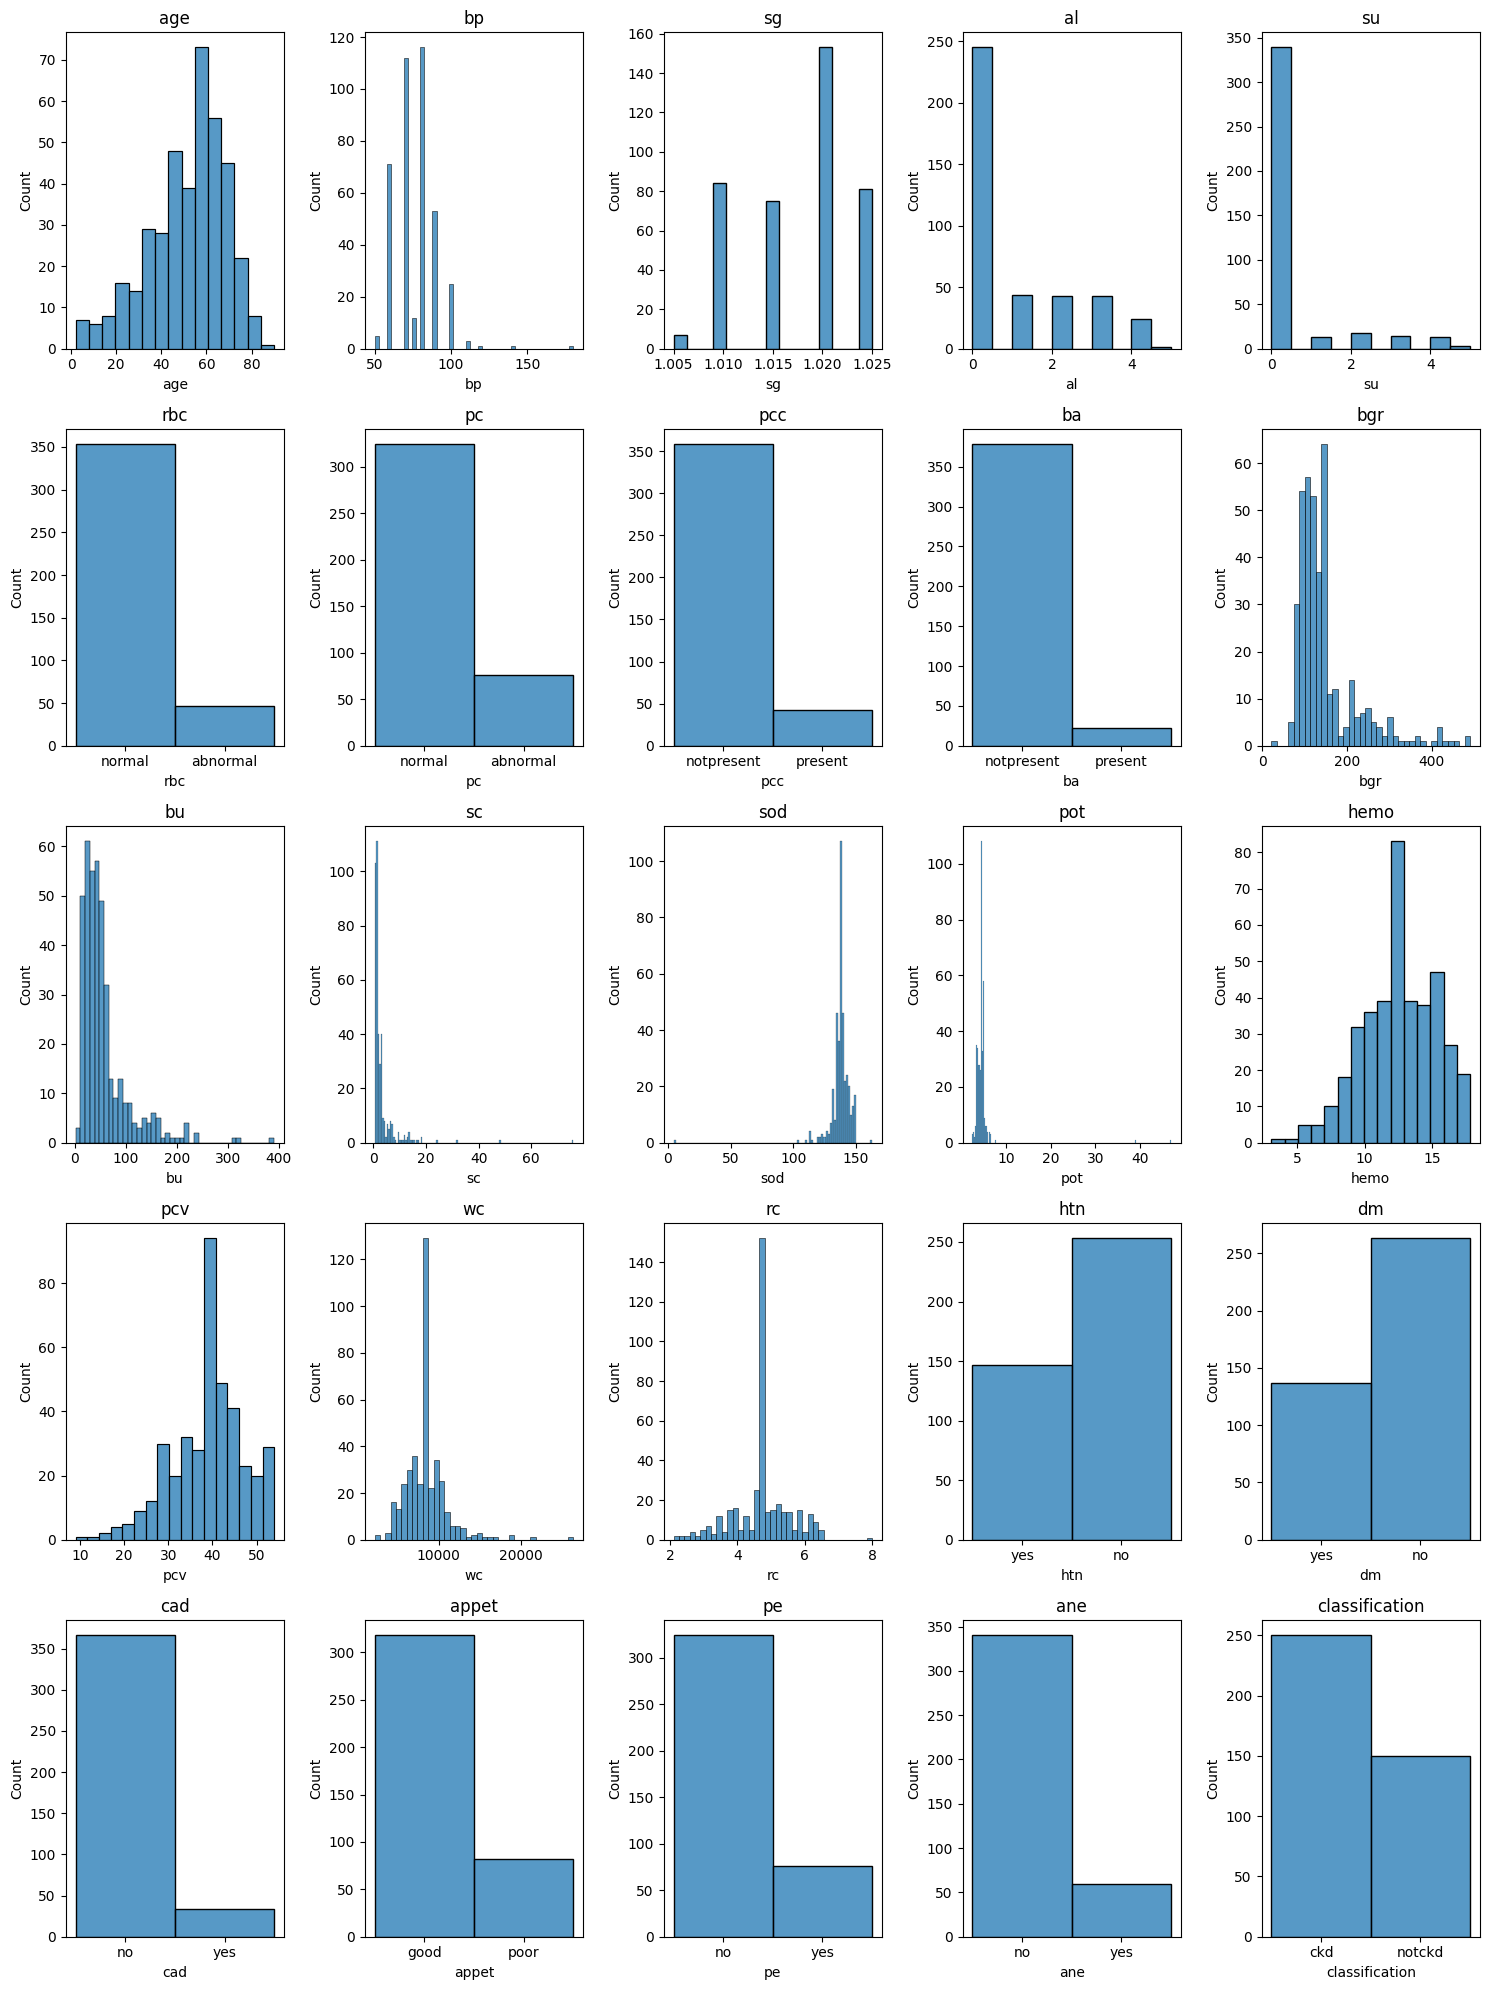

In [19]:
num=0
plt.figure(figsize=(15,20))
for col in kidney_data.columns:
  num+=1
  plt.subplot(5,5,num)
  sns.histplot(kidney_data[col])
  plt.title(f'{col}')
  plt.tight_layout()
plt.show()

__Observation:__ `kidney_data` is imbalanced. This will be addressed while splitting the dataset into independent and target variables

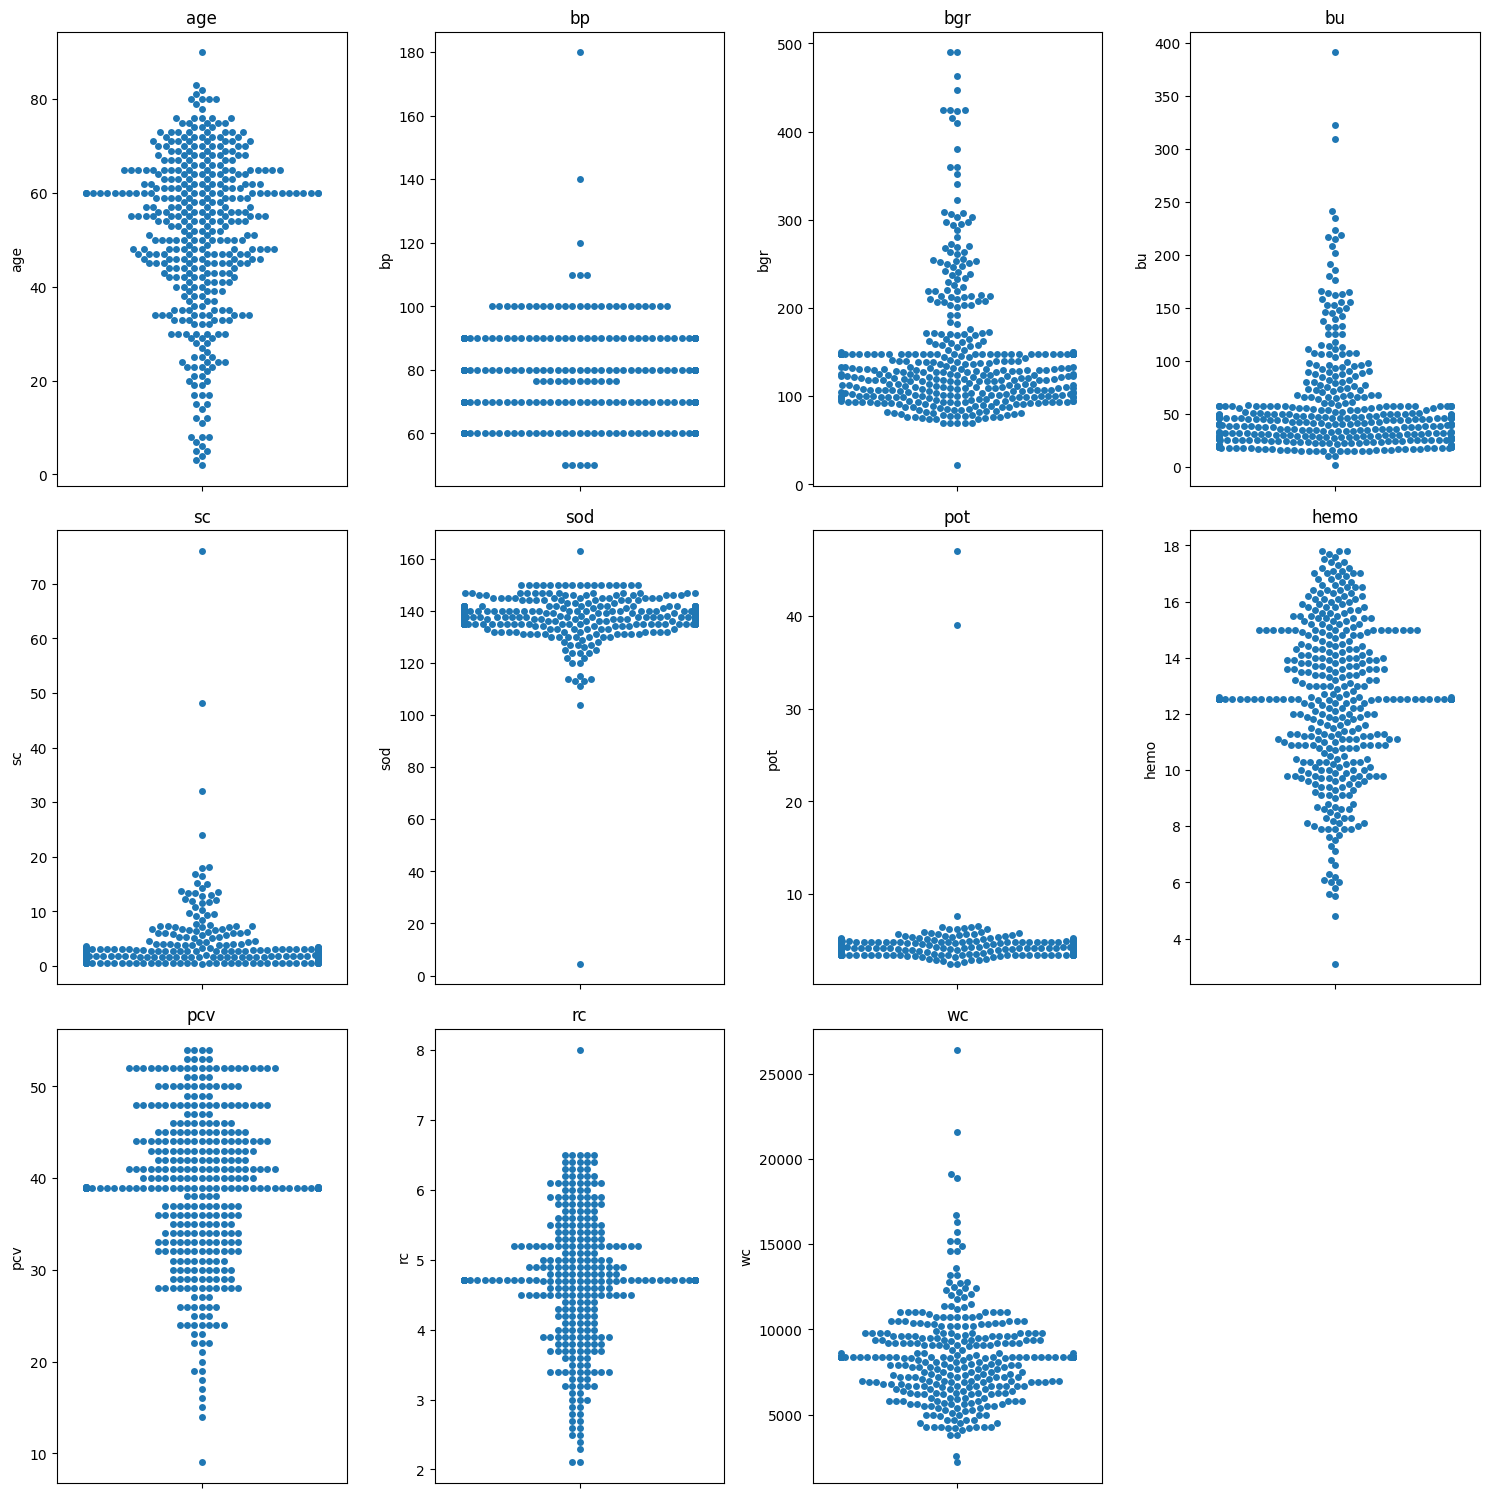

In [20]:
num=0
plt.figure(figsize=(15,30))
for col in Continuous['Continuous Columns']:
  num+=1
  plt.subplot(6,4,num)
  sns.swarmplot(kidney_data[col])
  plt.title(f'{col}')
  plt.tight_layout()
plt.show()

__Observations:__ Outliers present in almost all the continuous features. These outliers will be retained as in the medical field there are probability of rare/anamolous cases. These cases are cruicial for early prediction of CKD

__Bivariate Analysis__

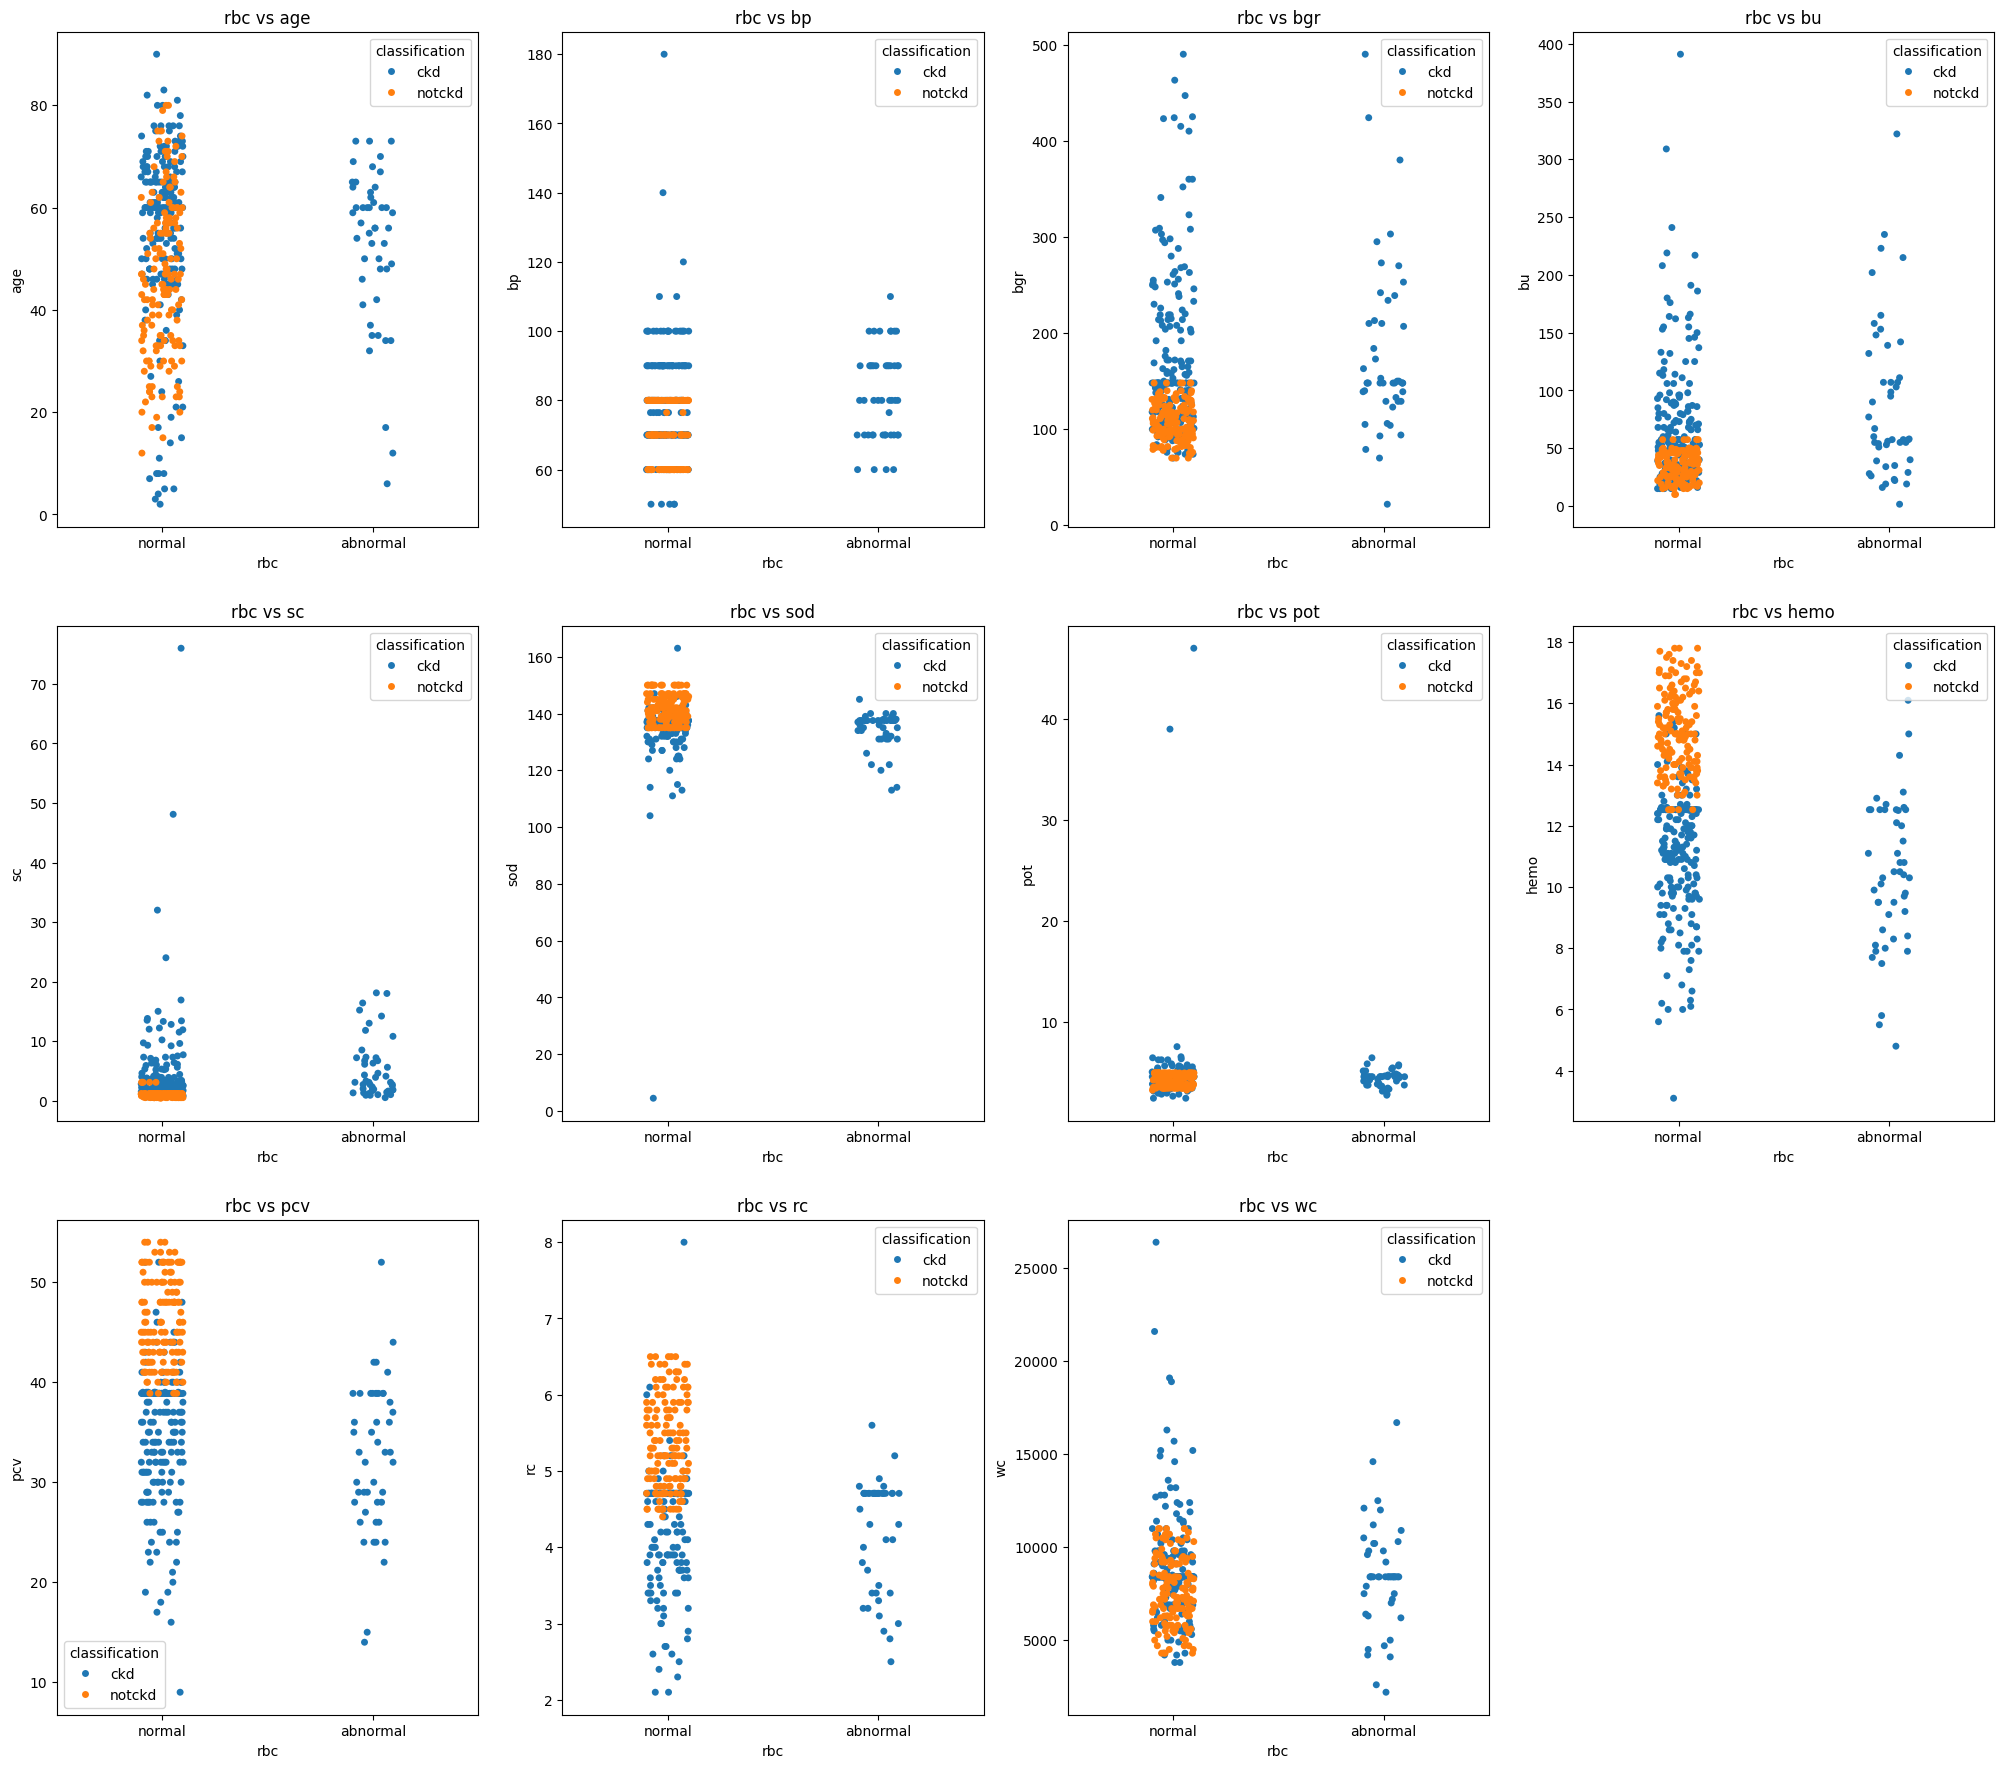

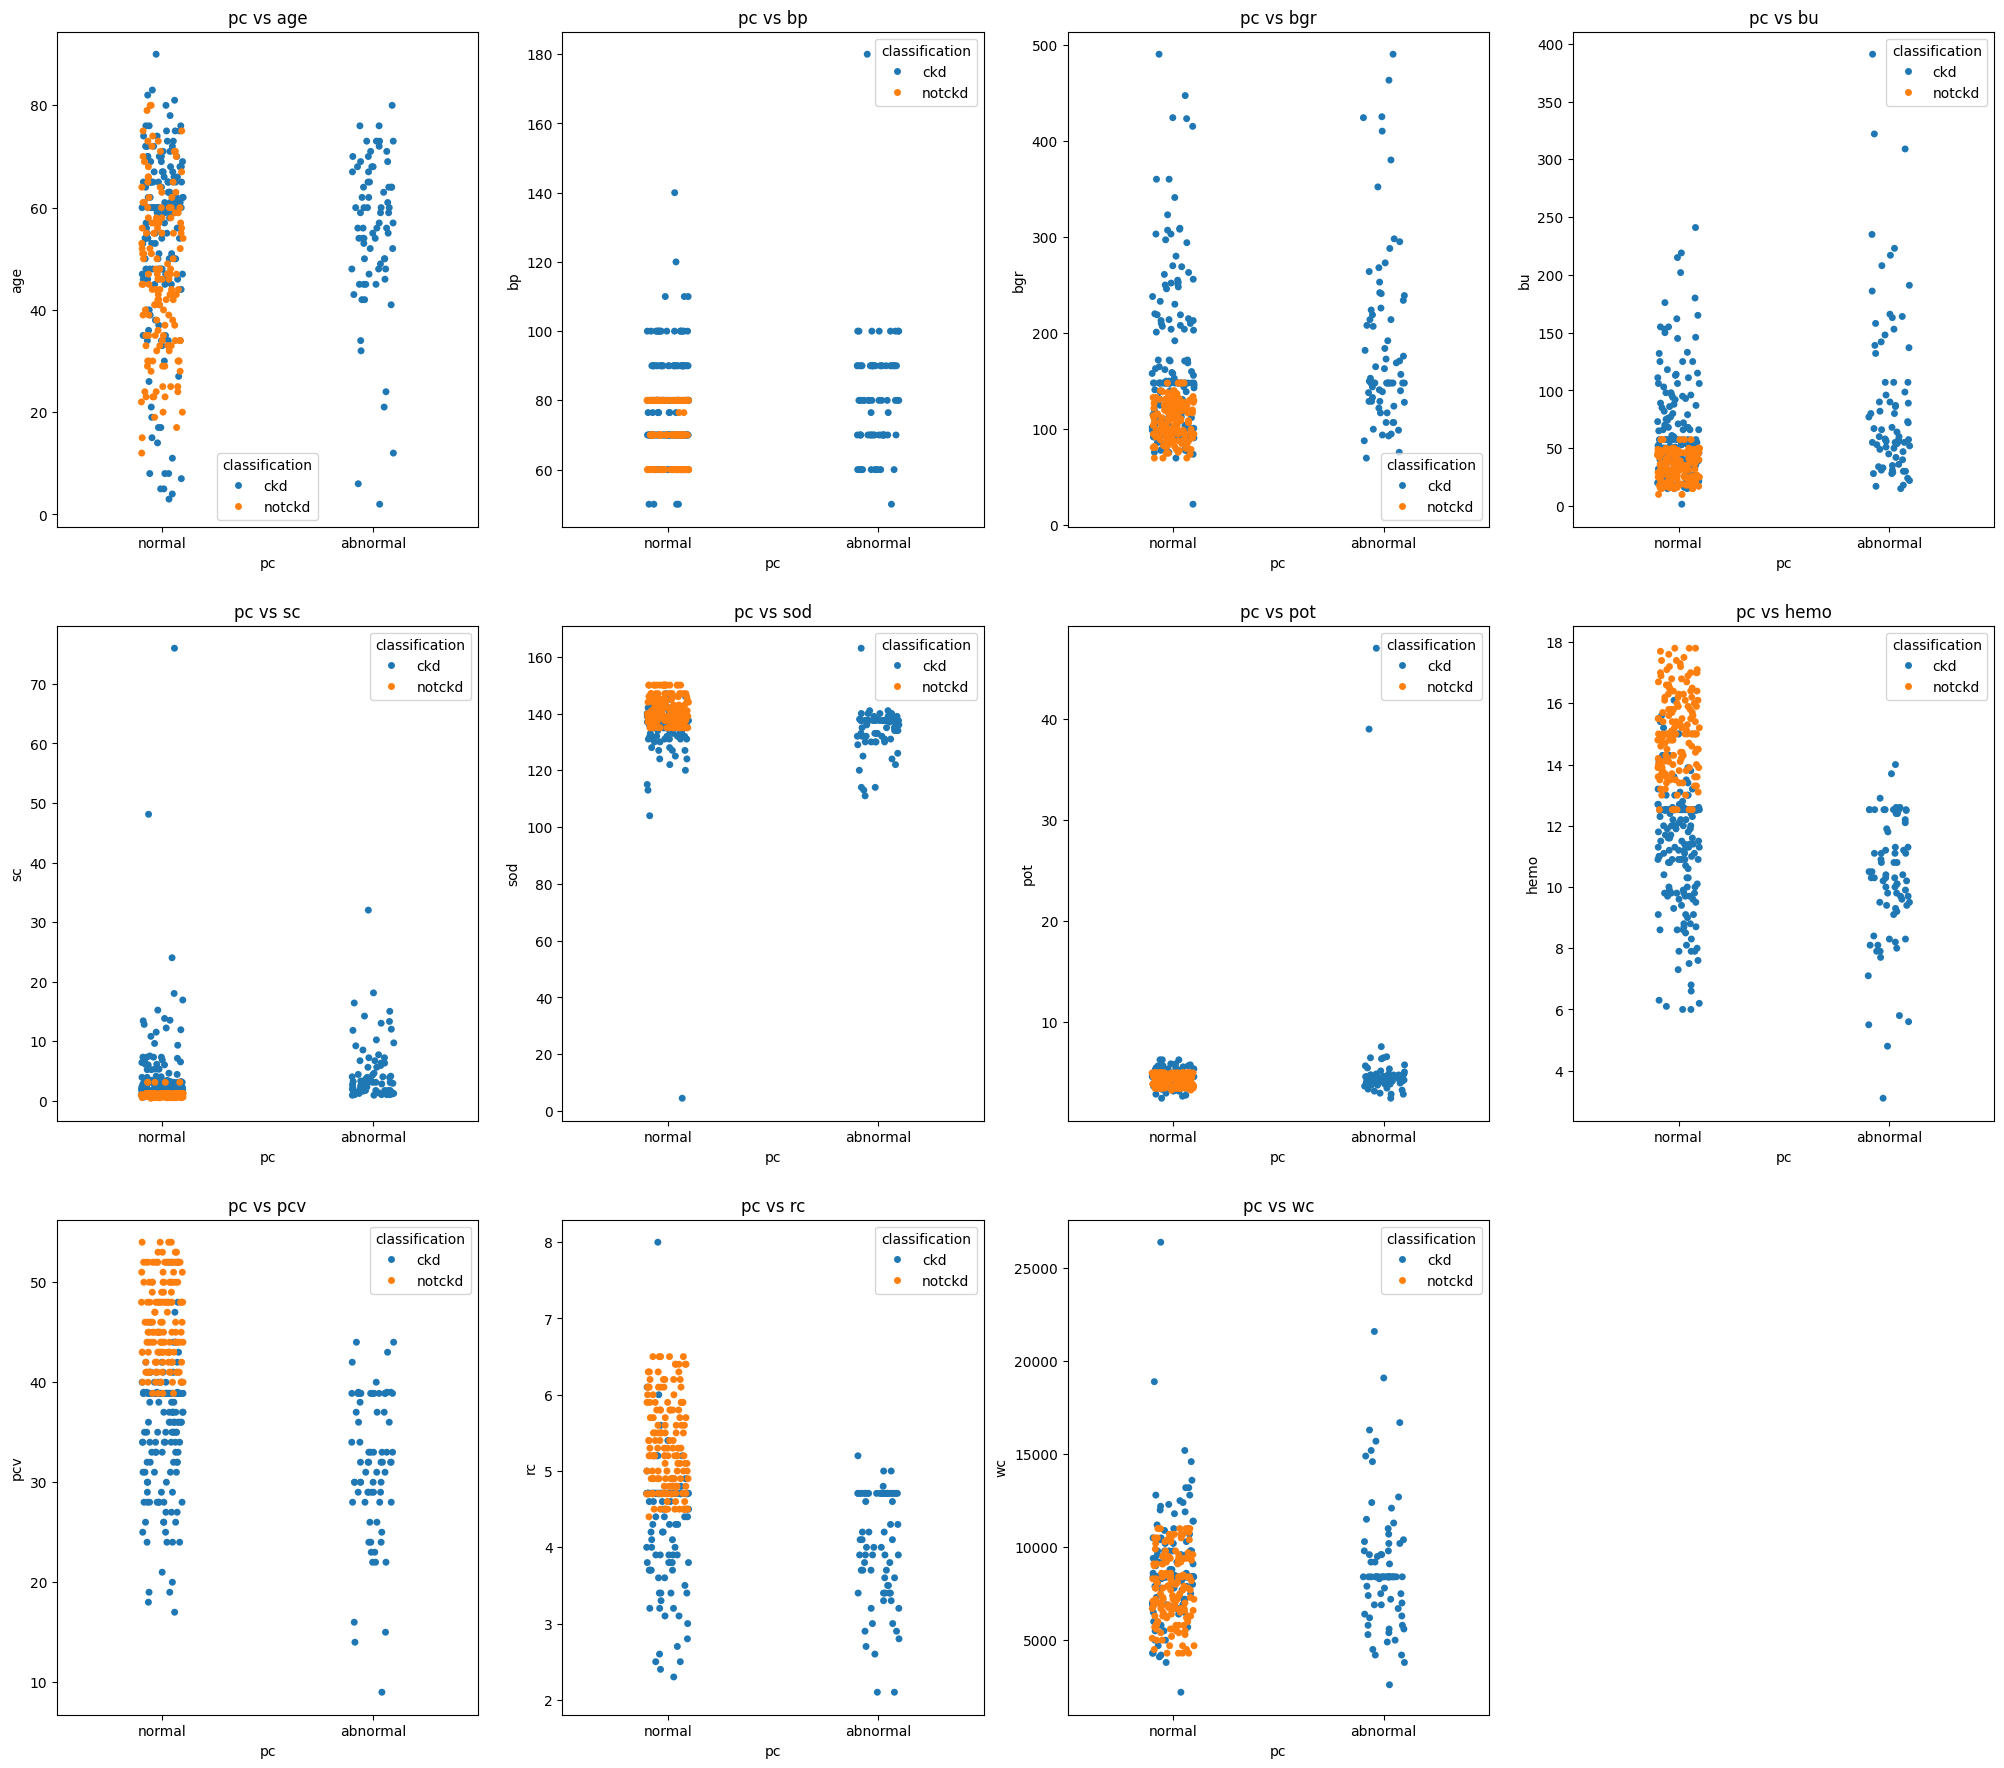

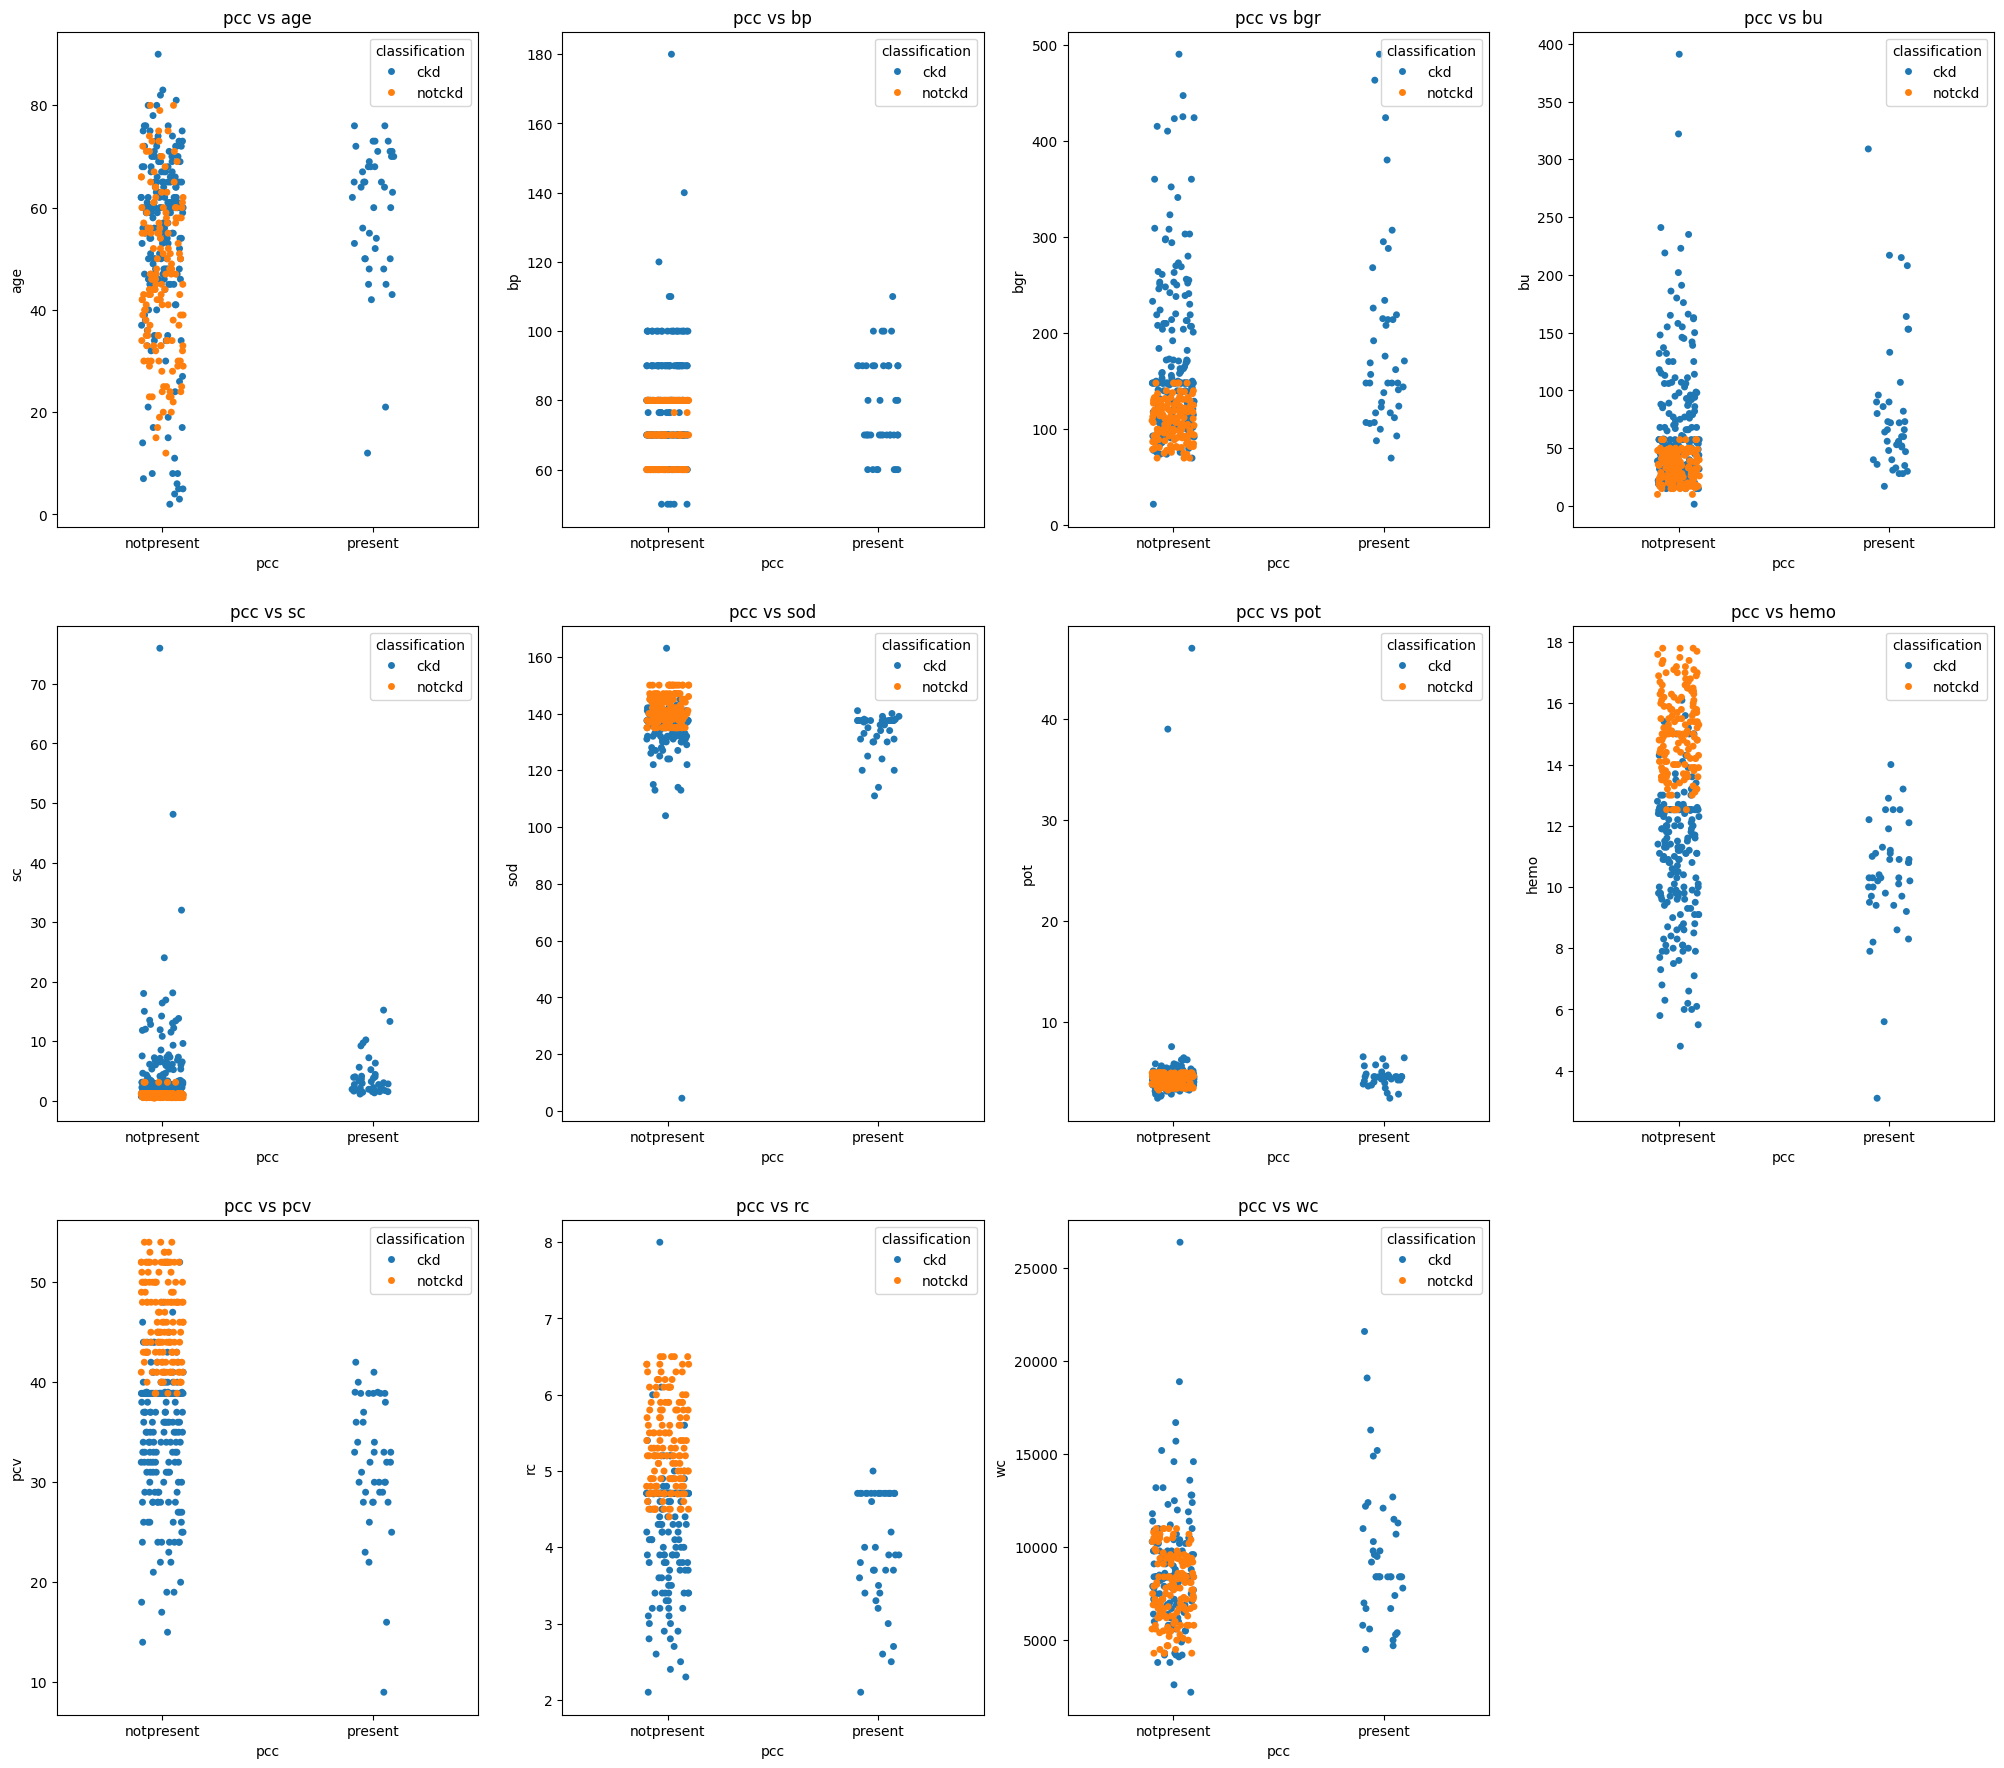

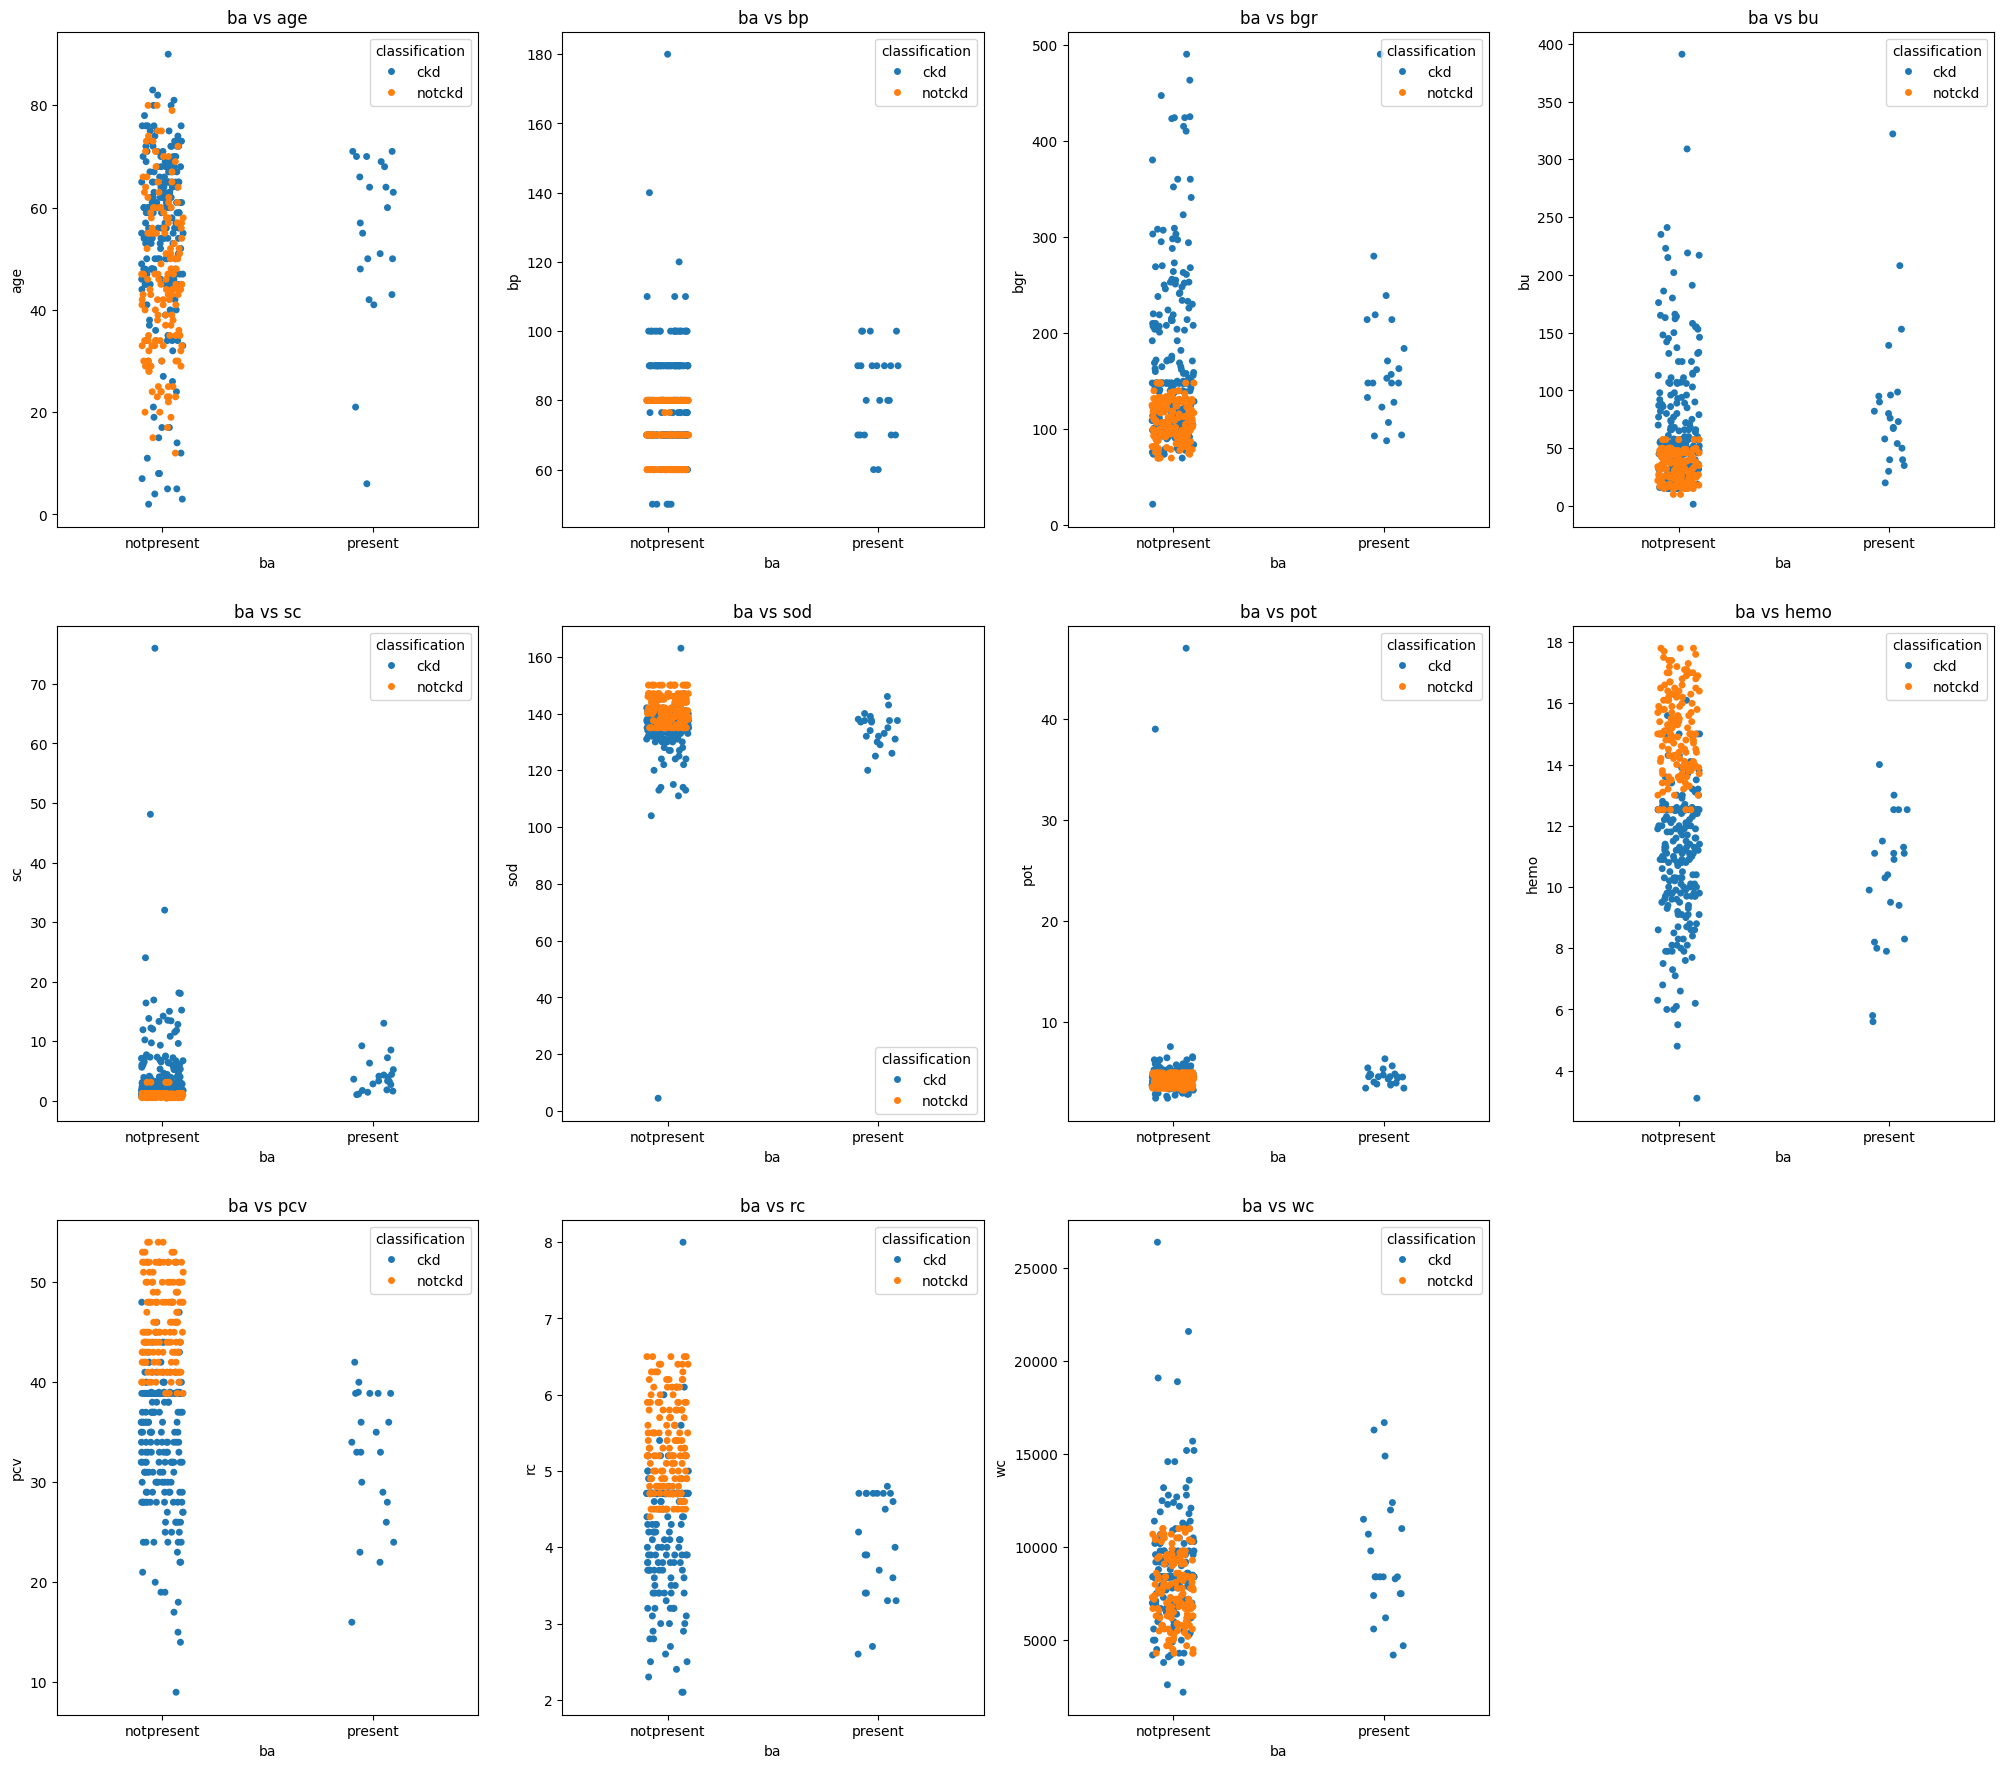

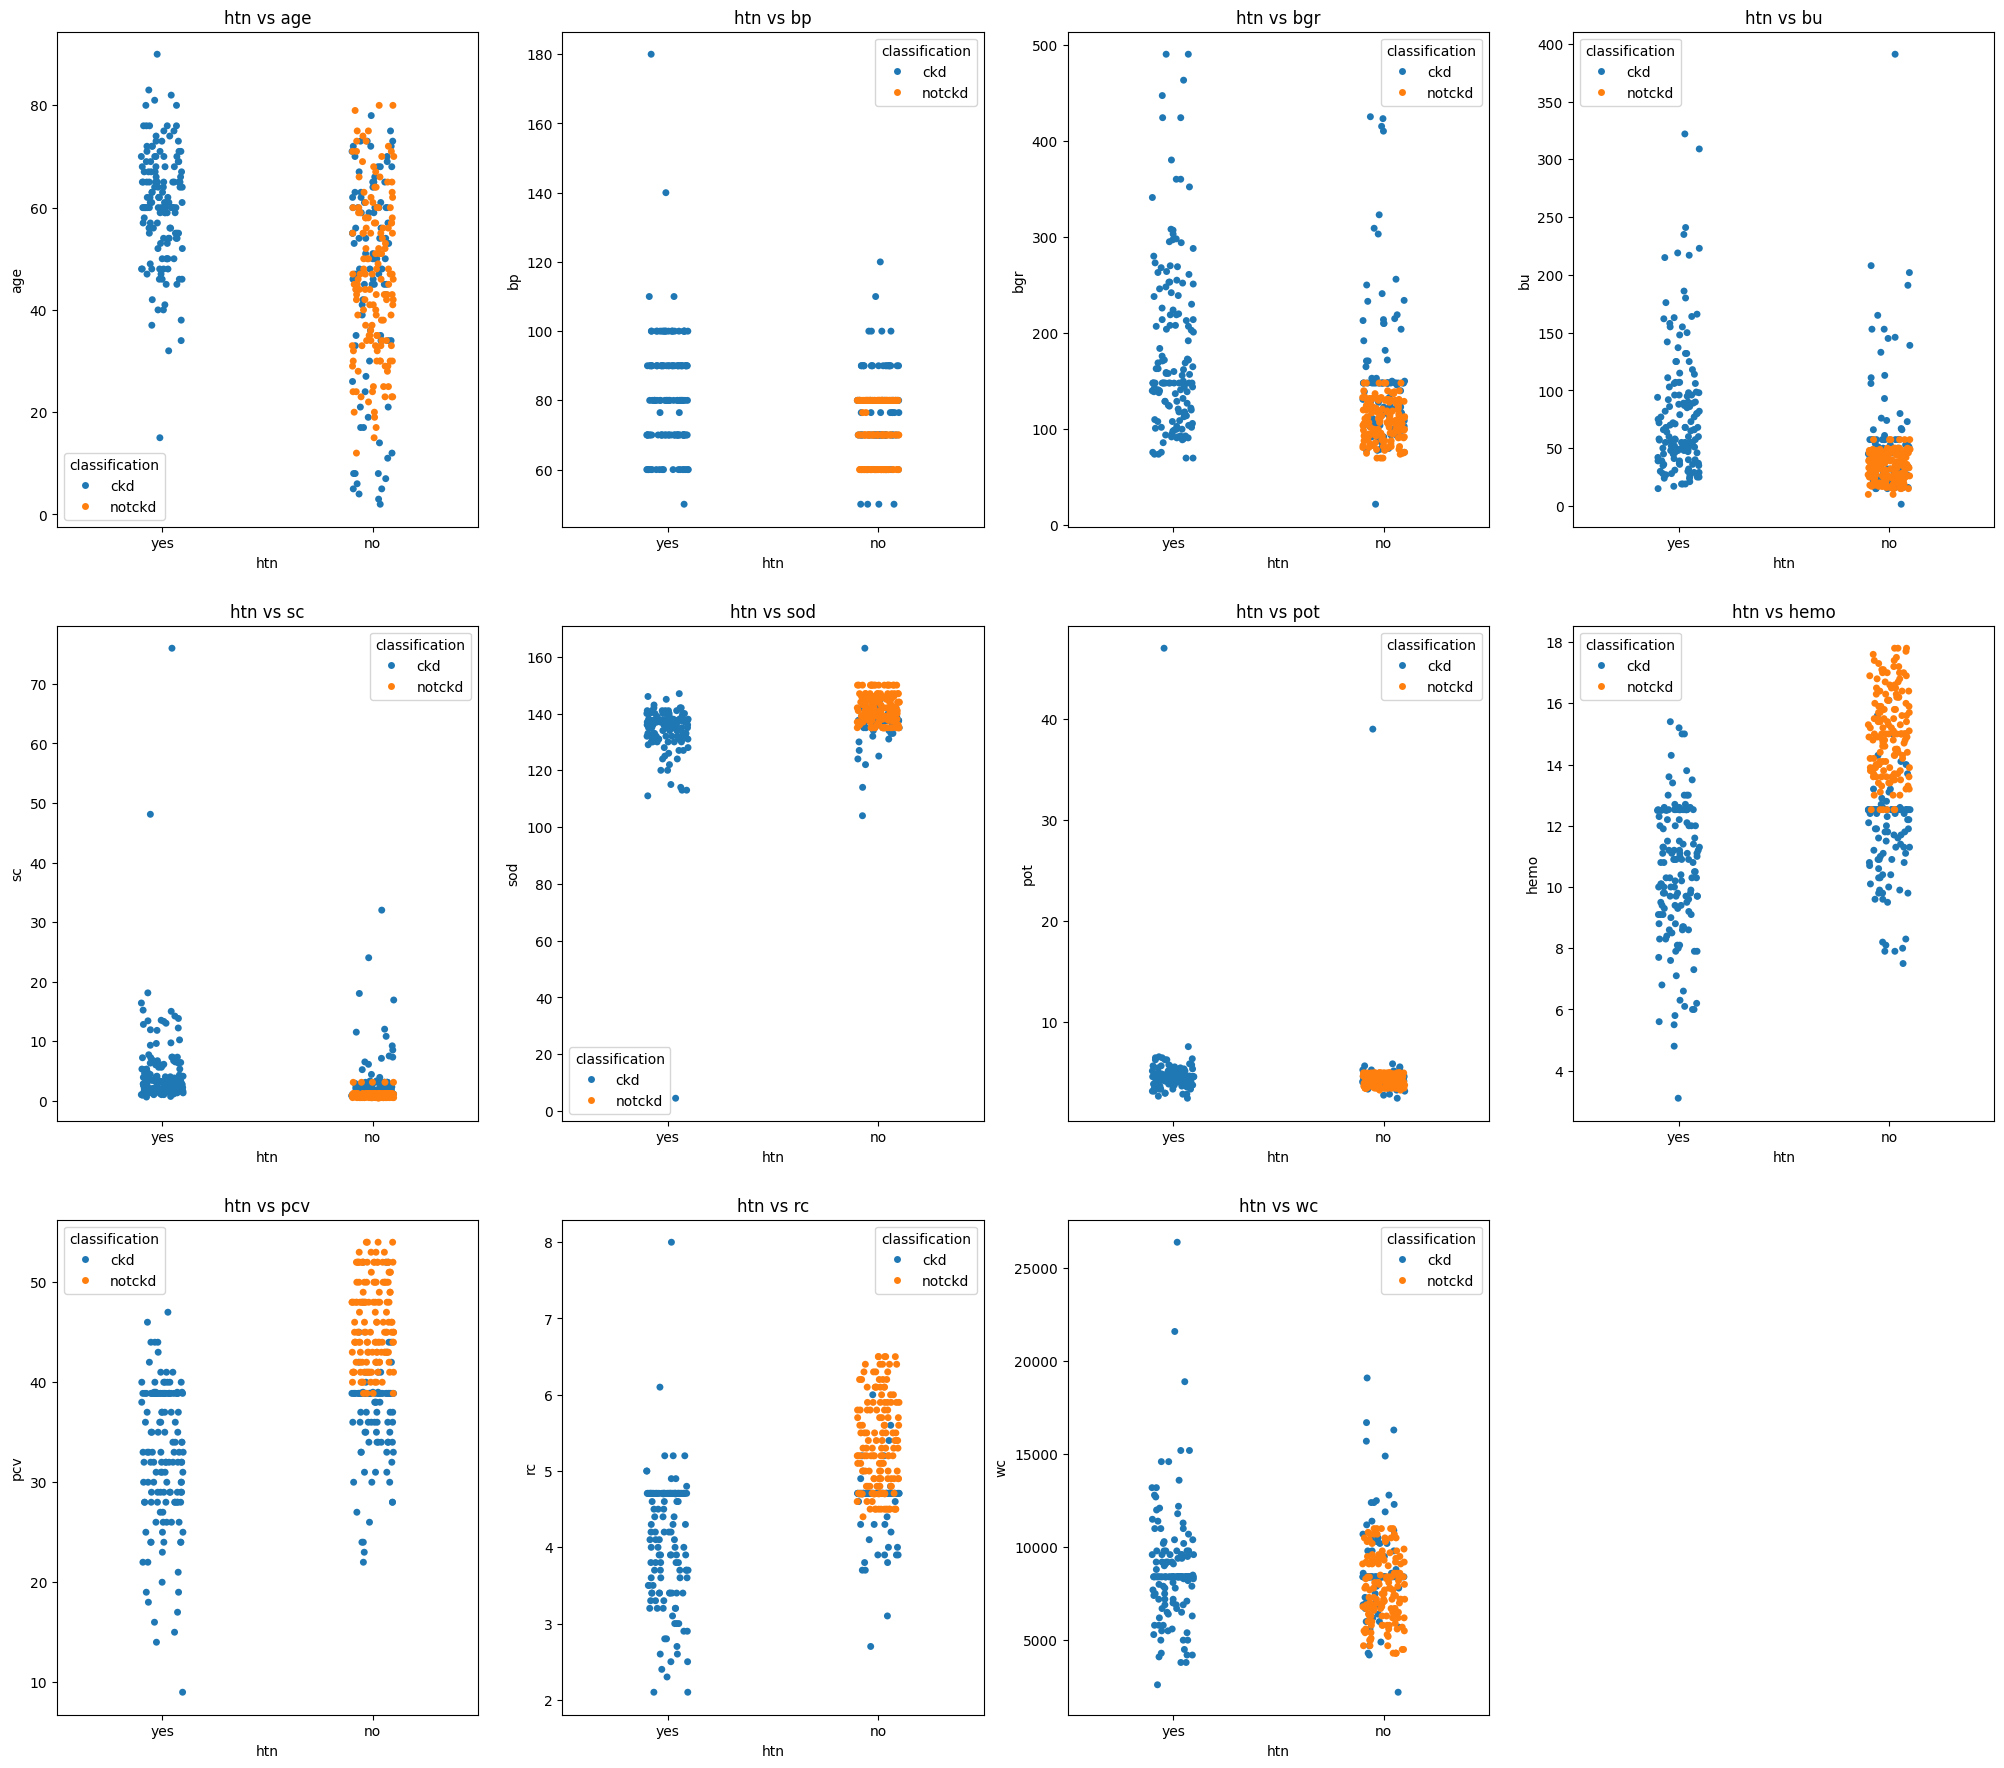

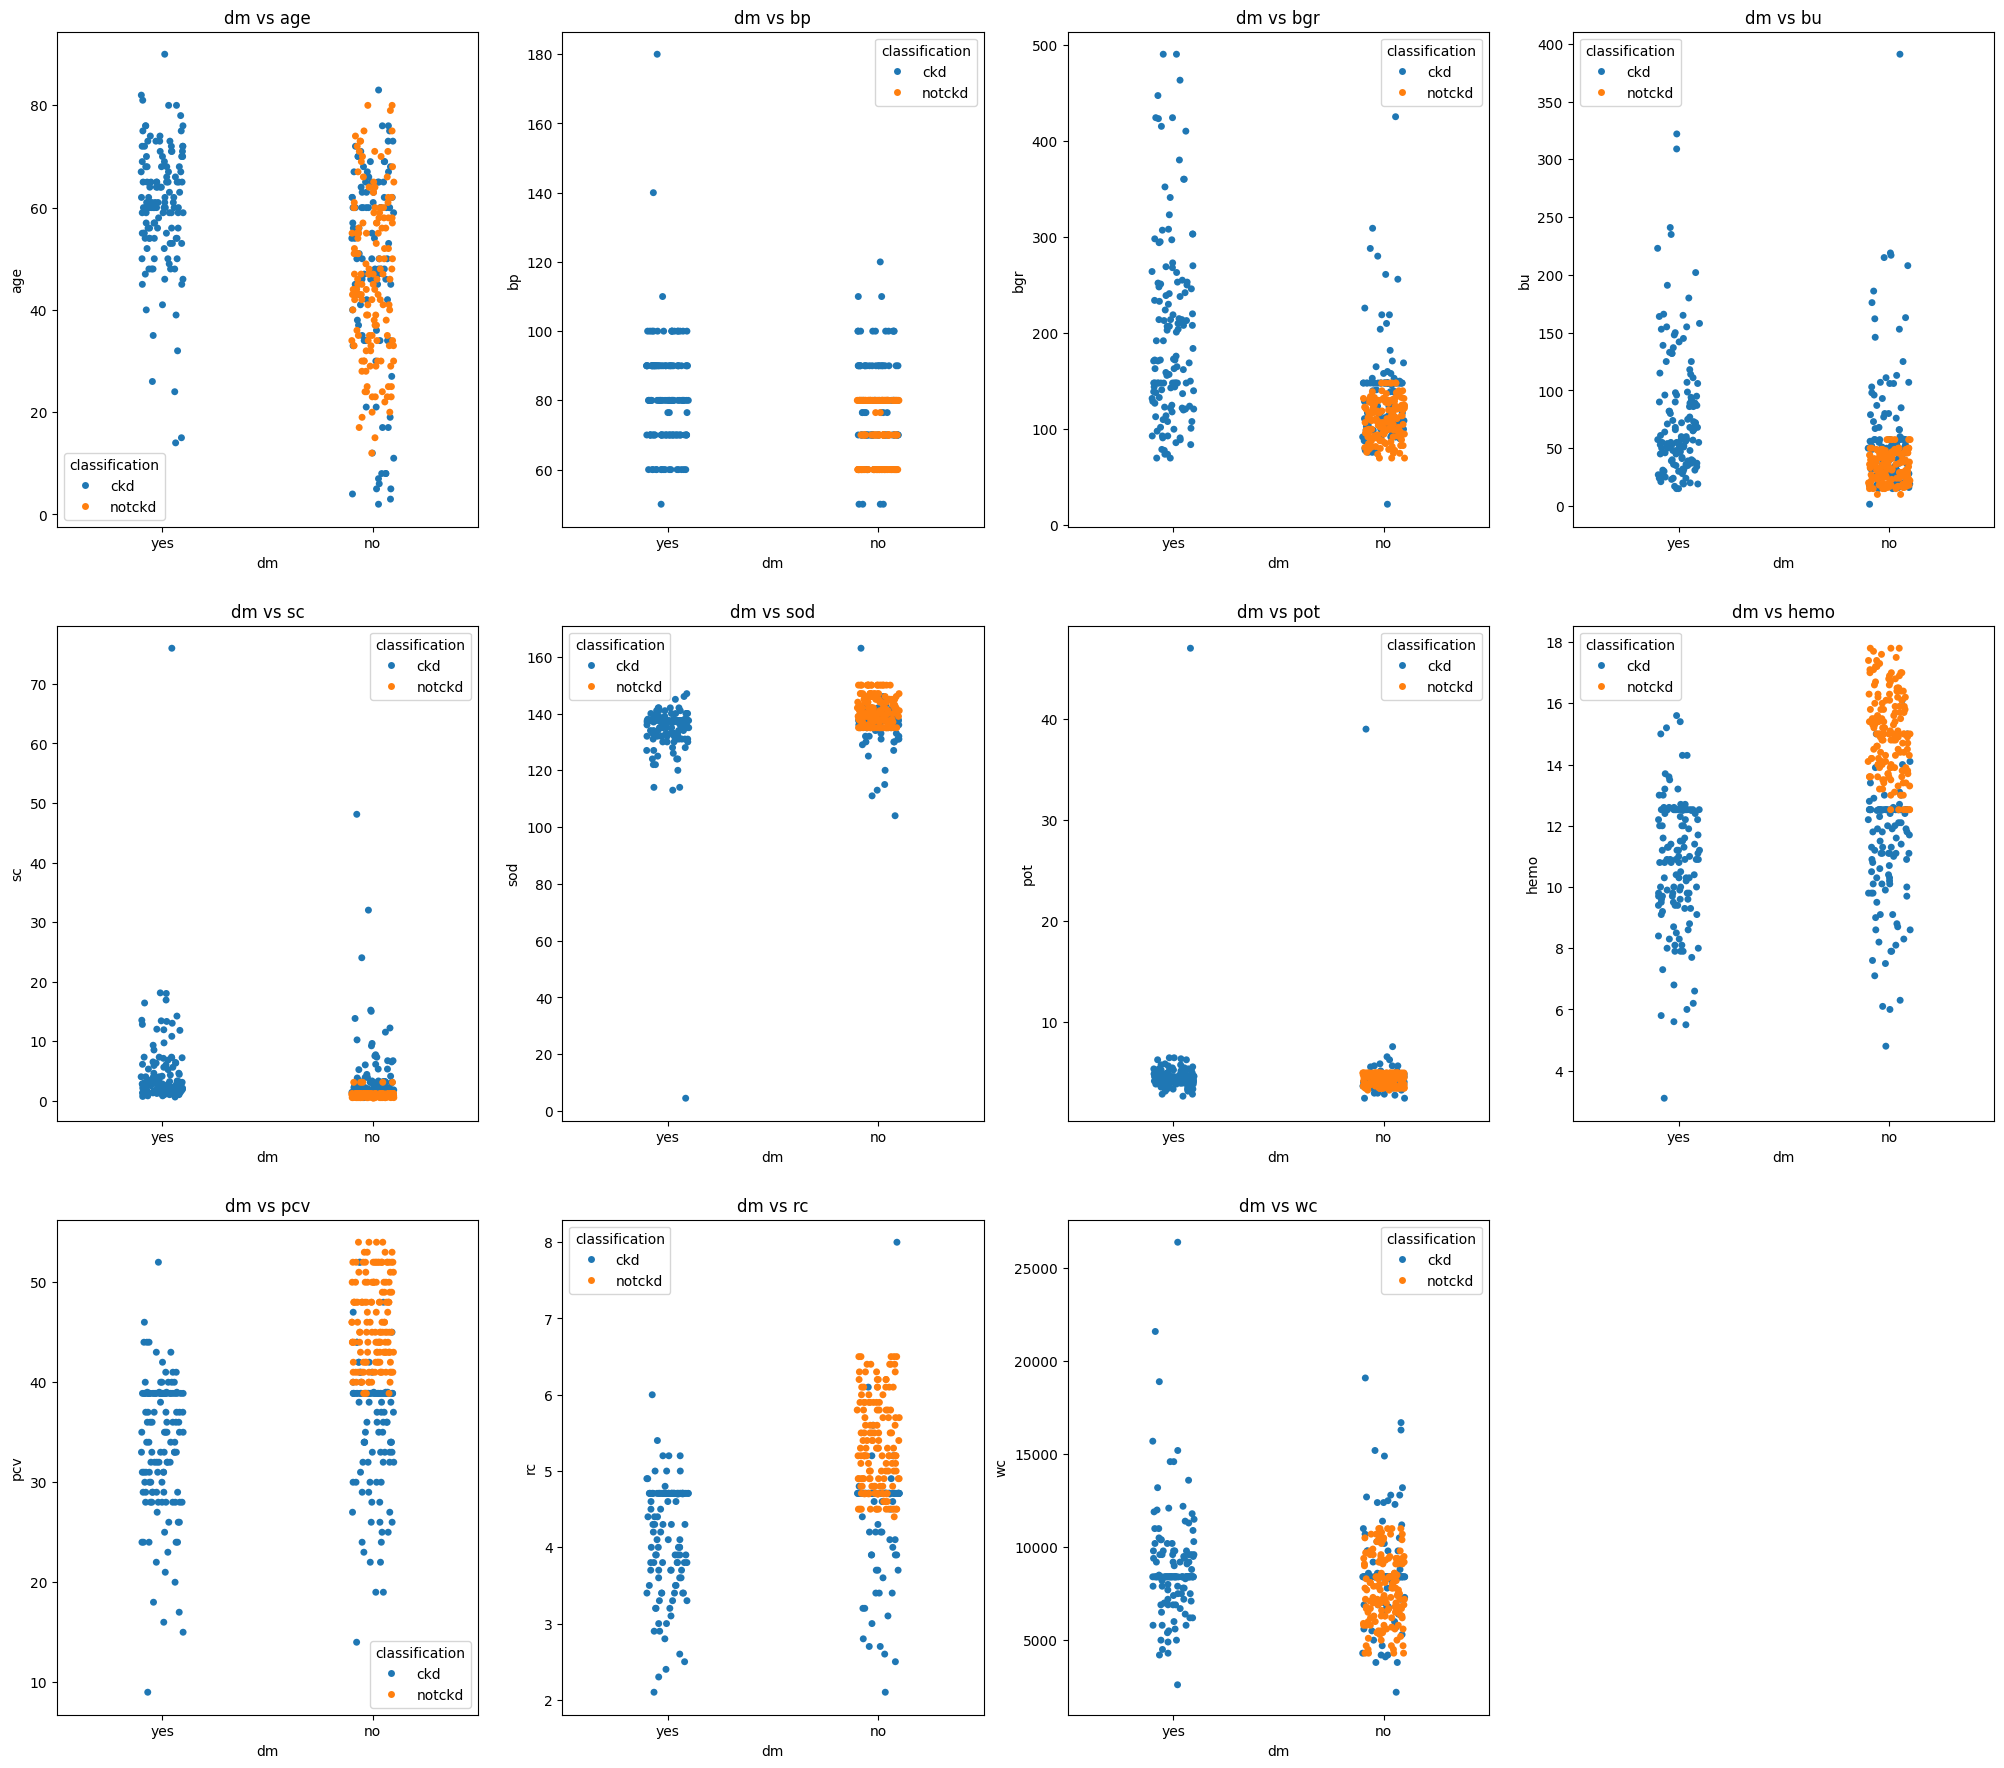

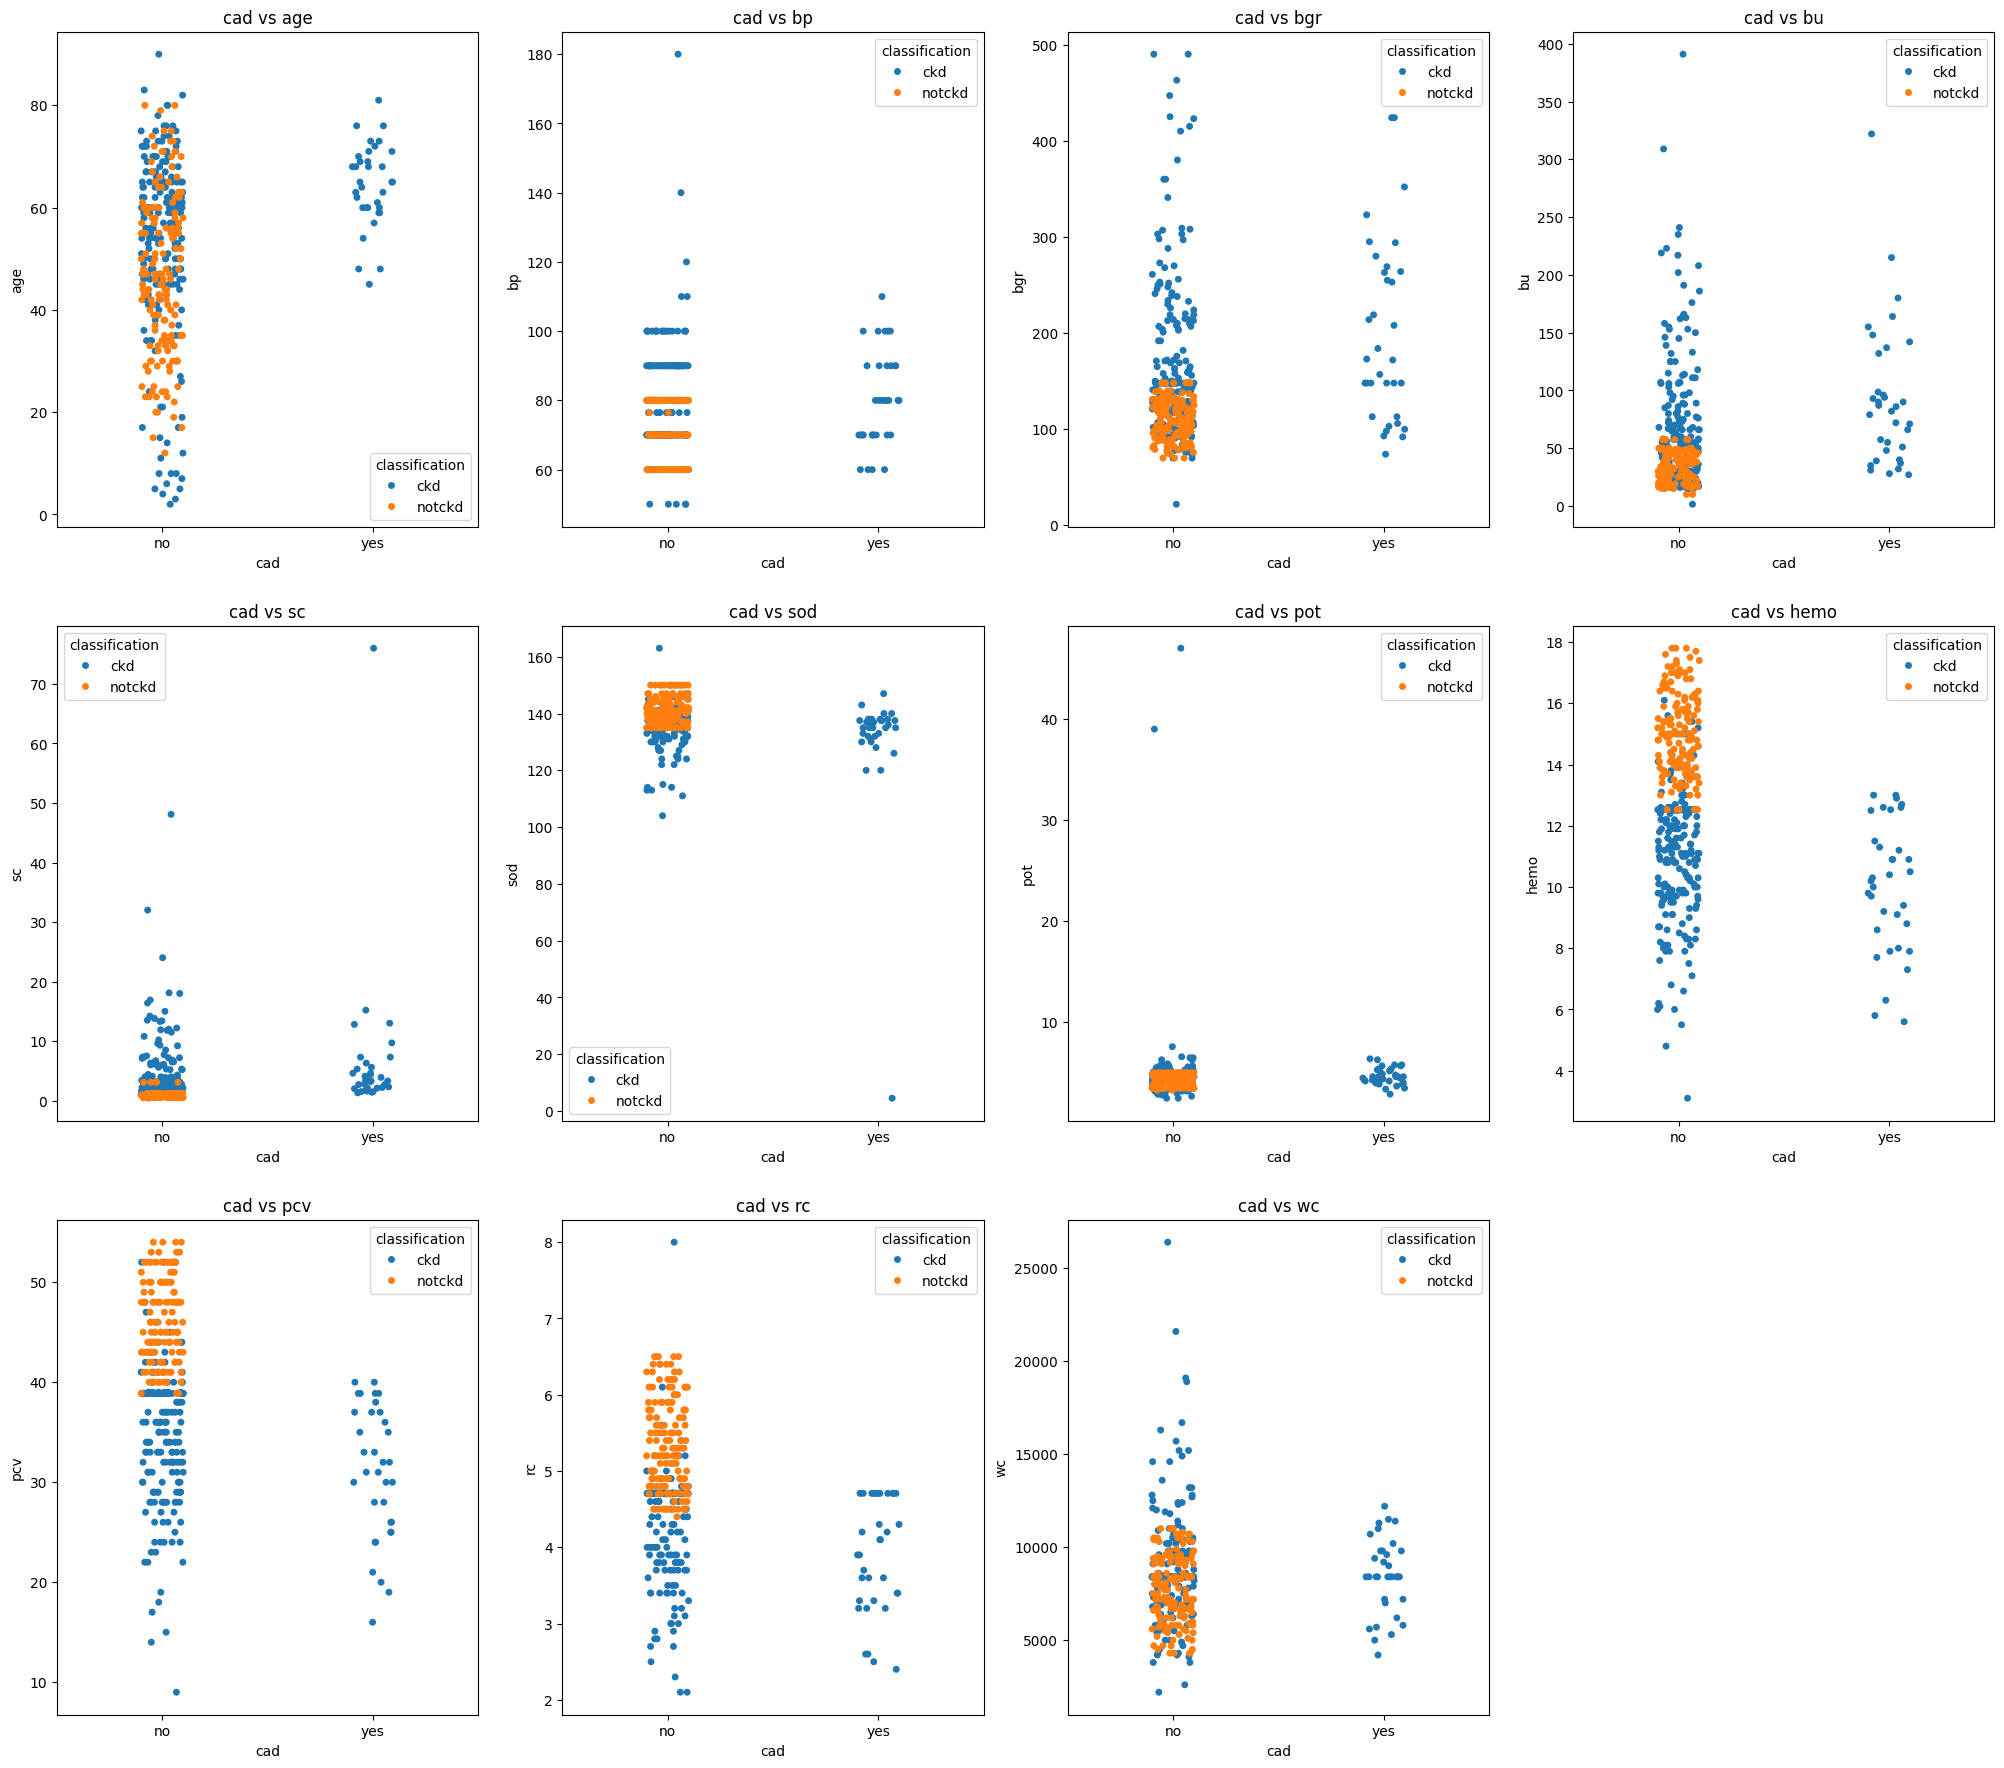

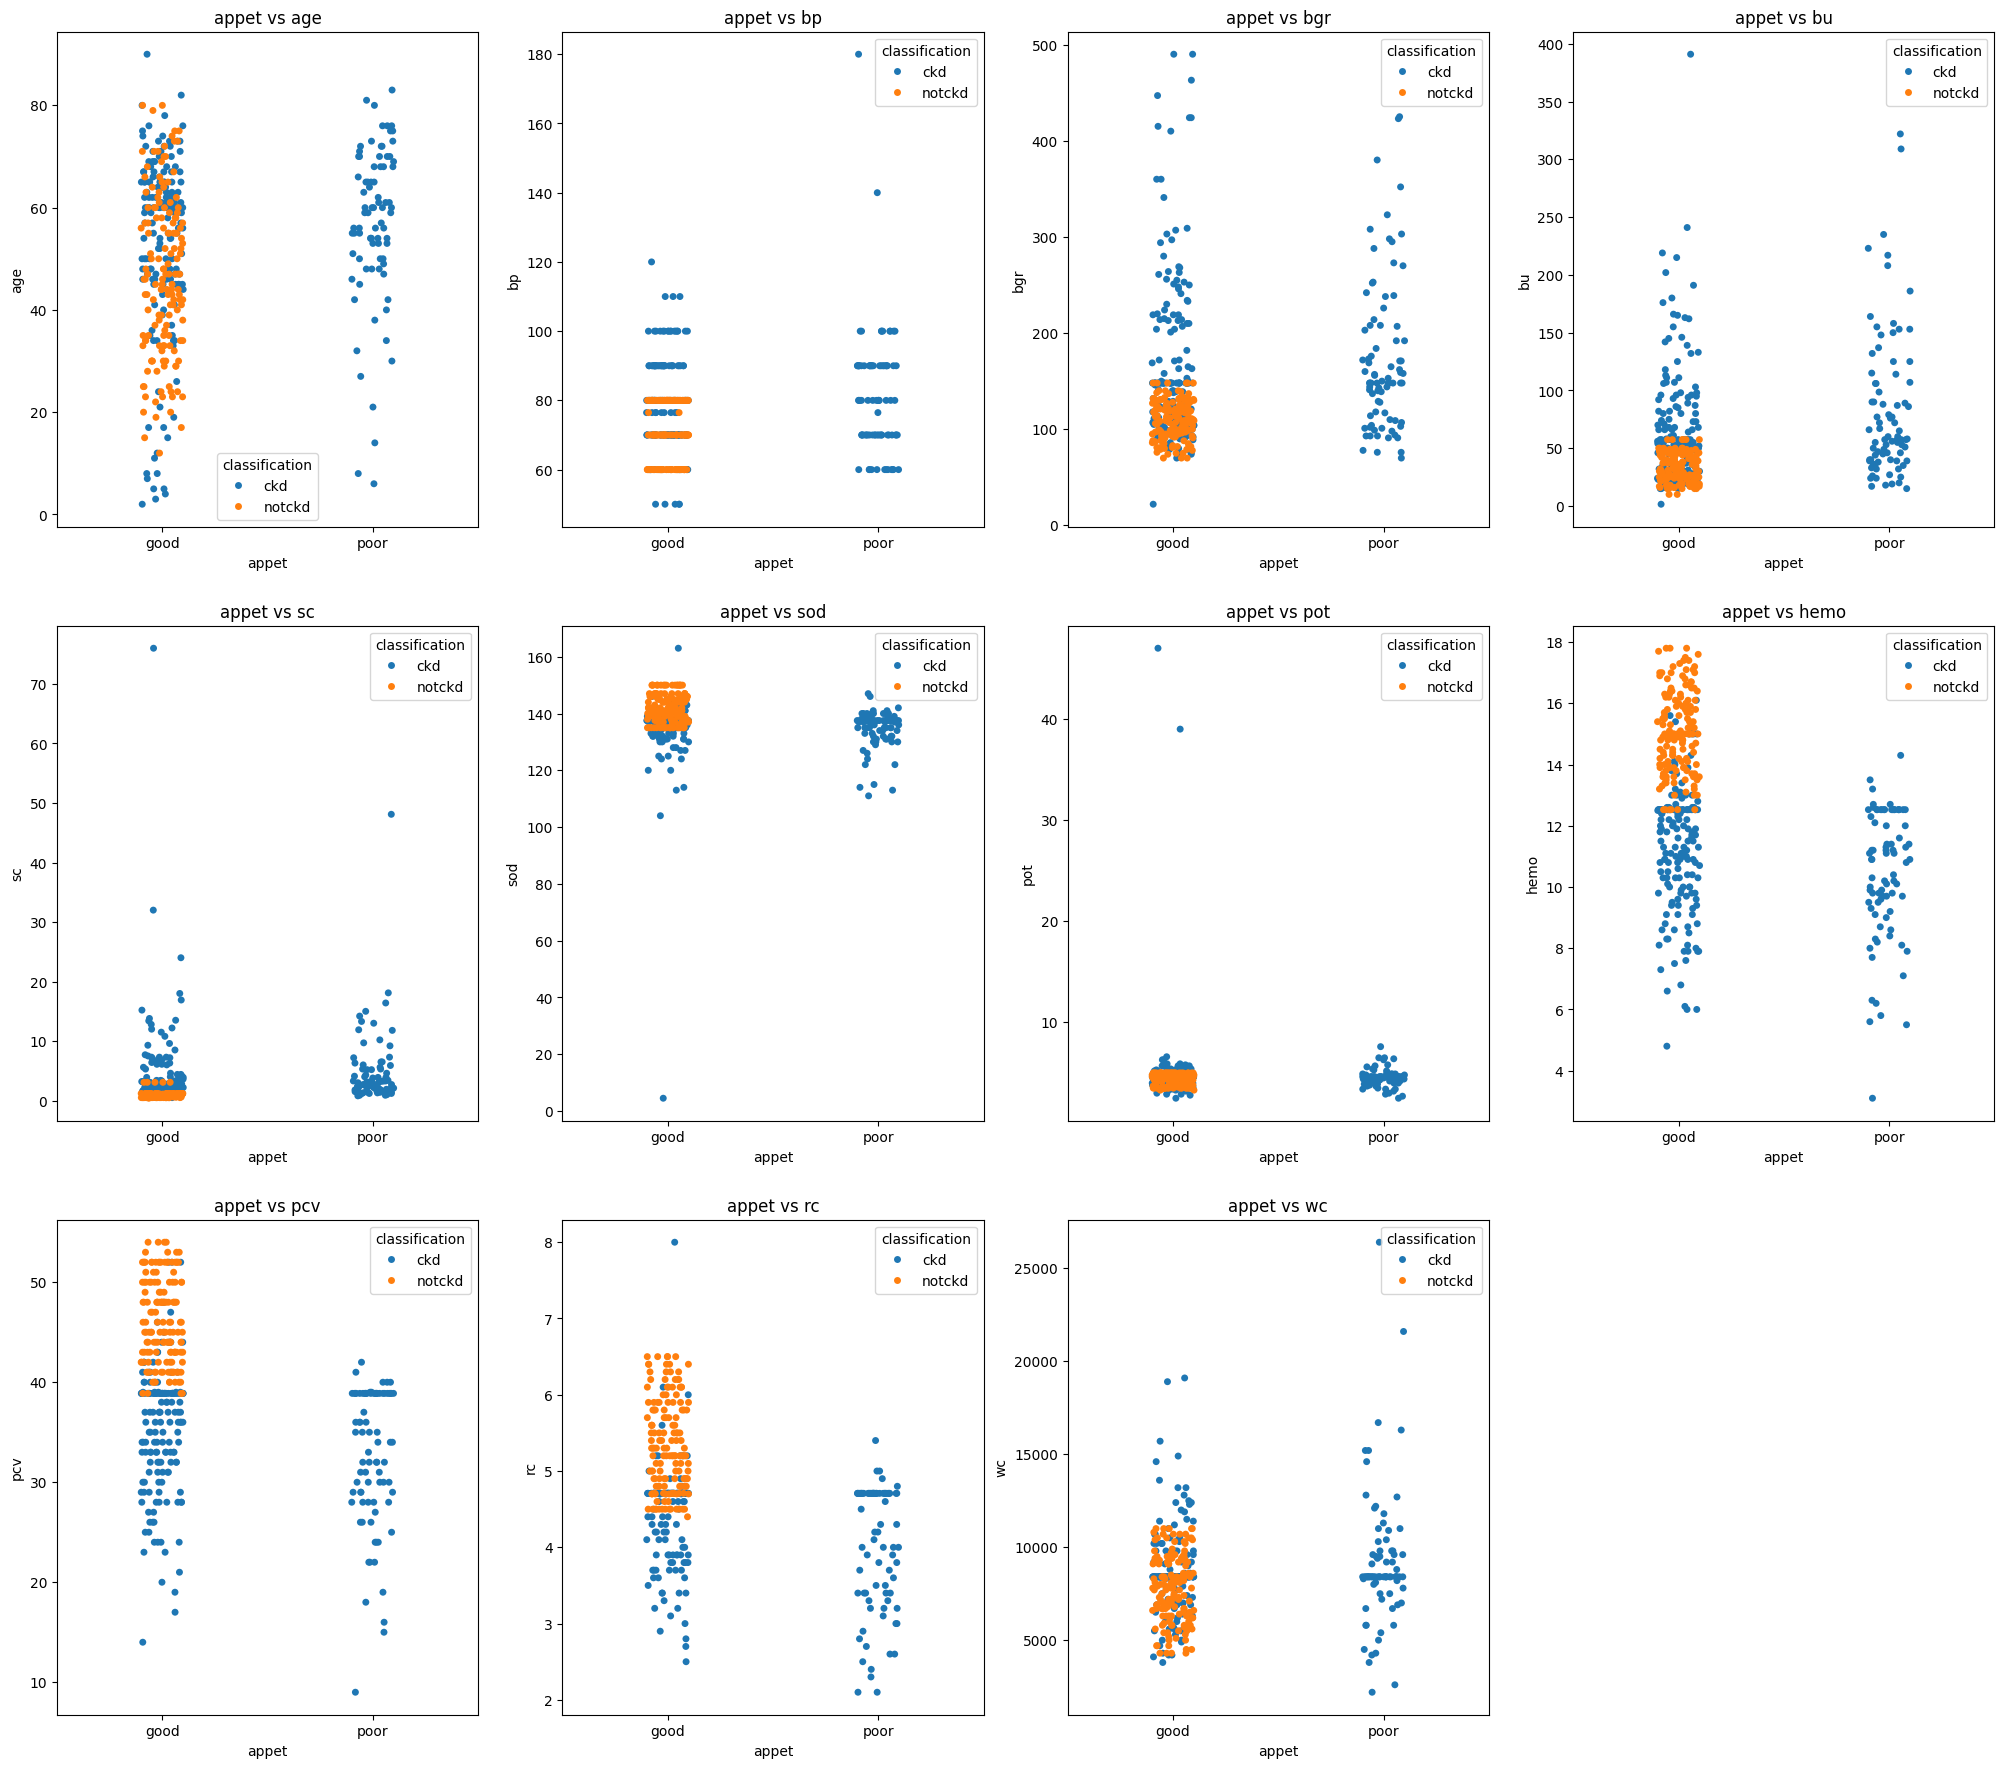

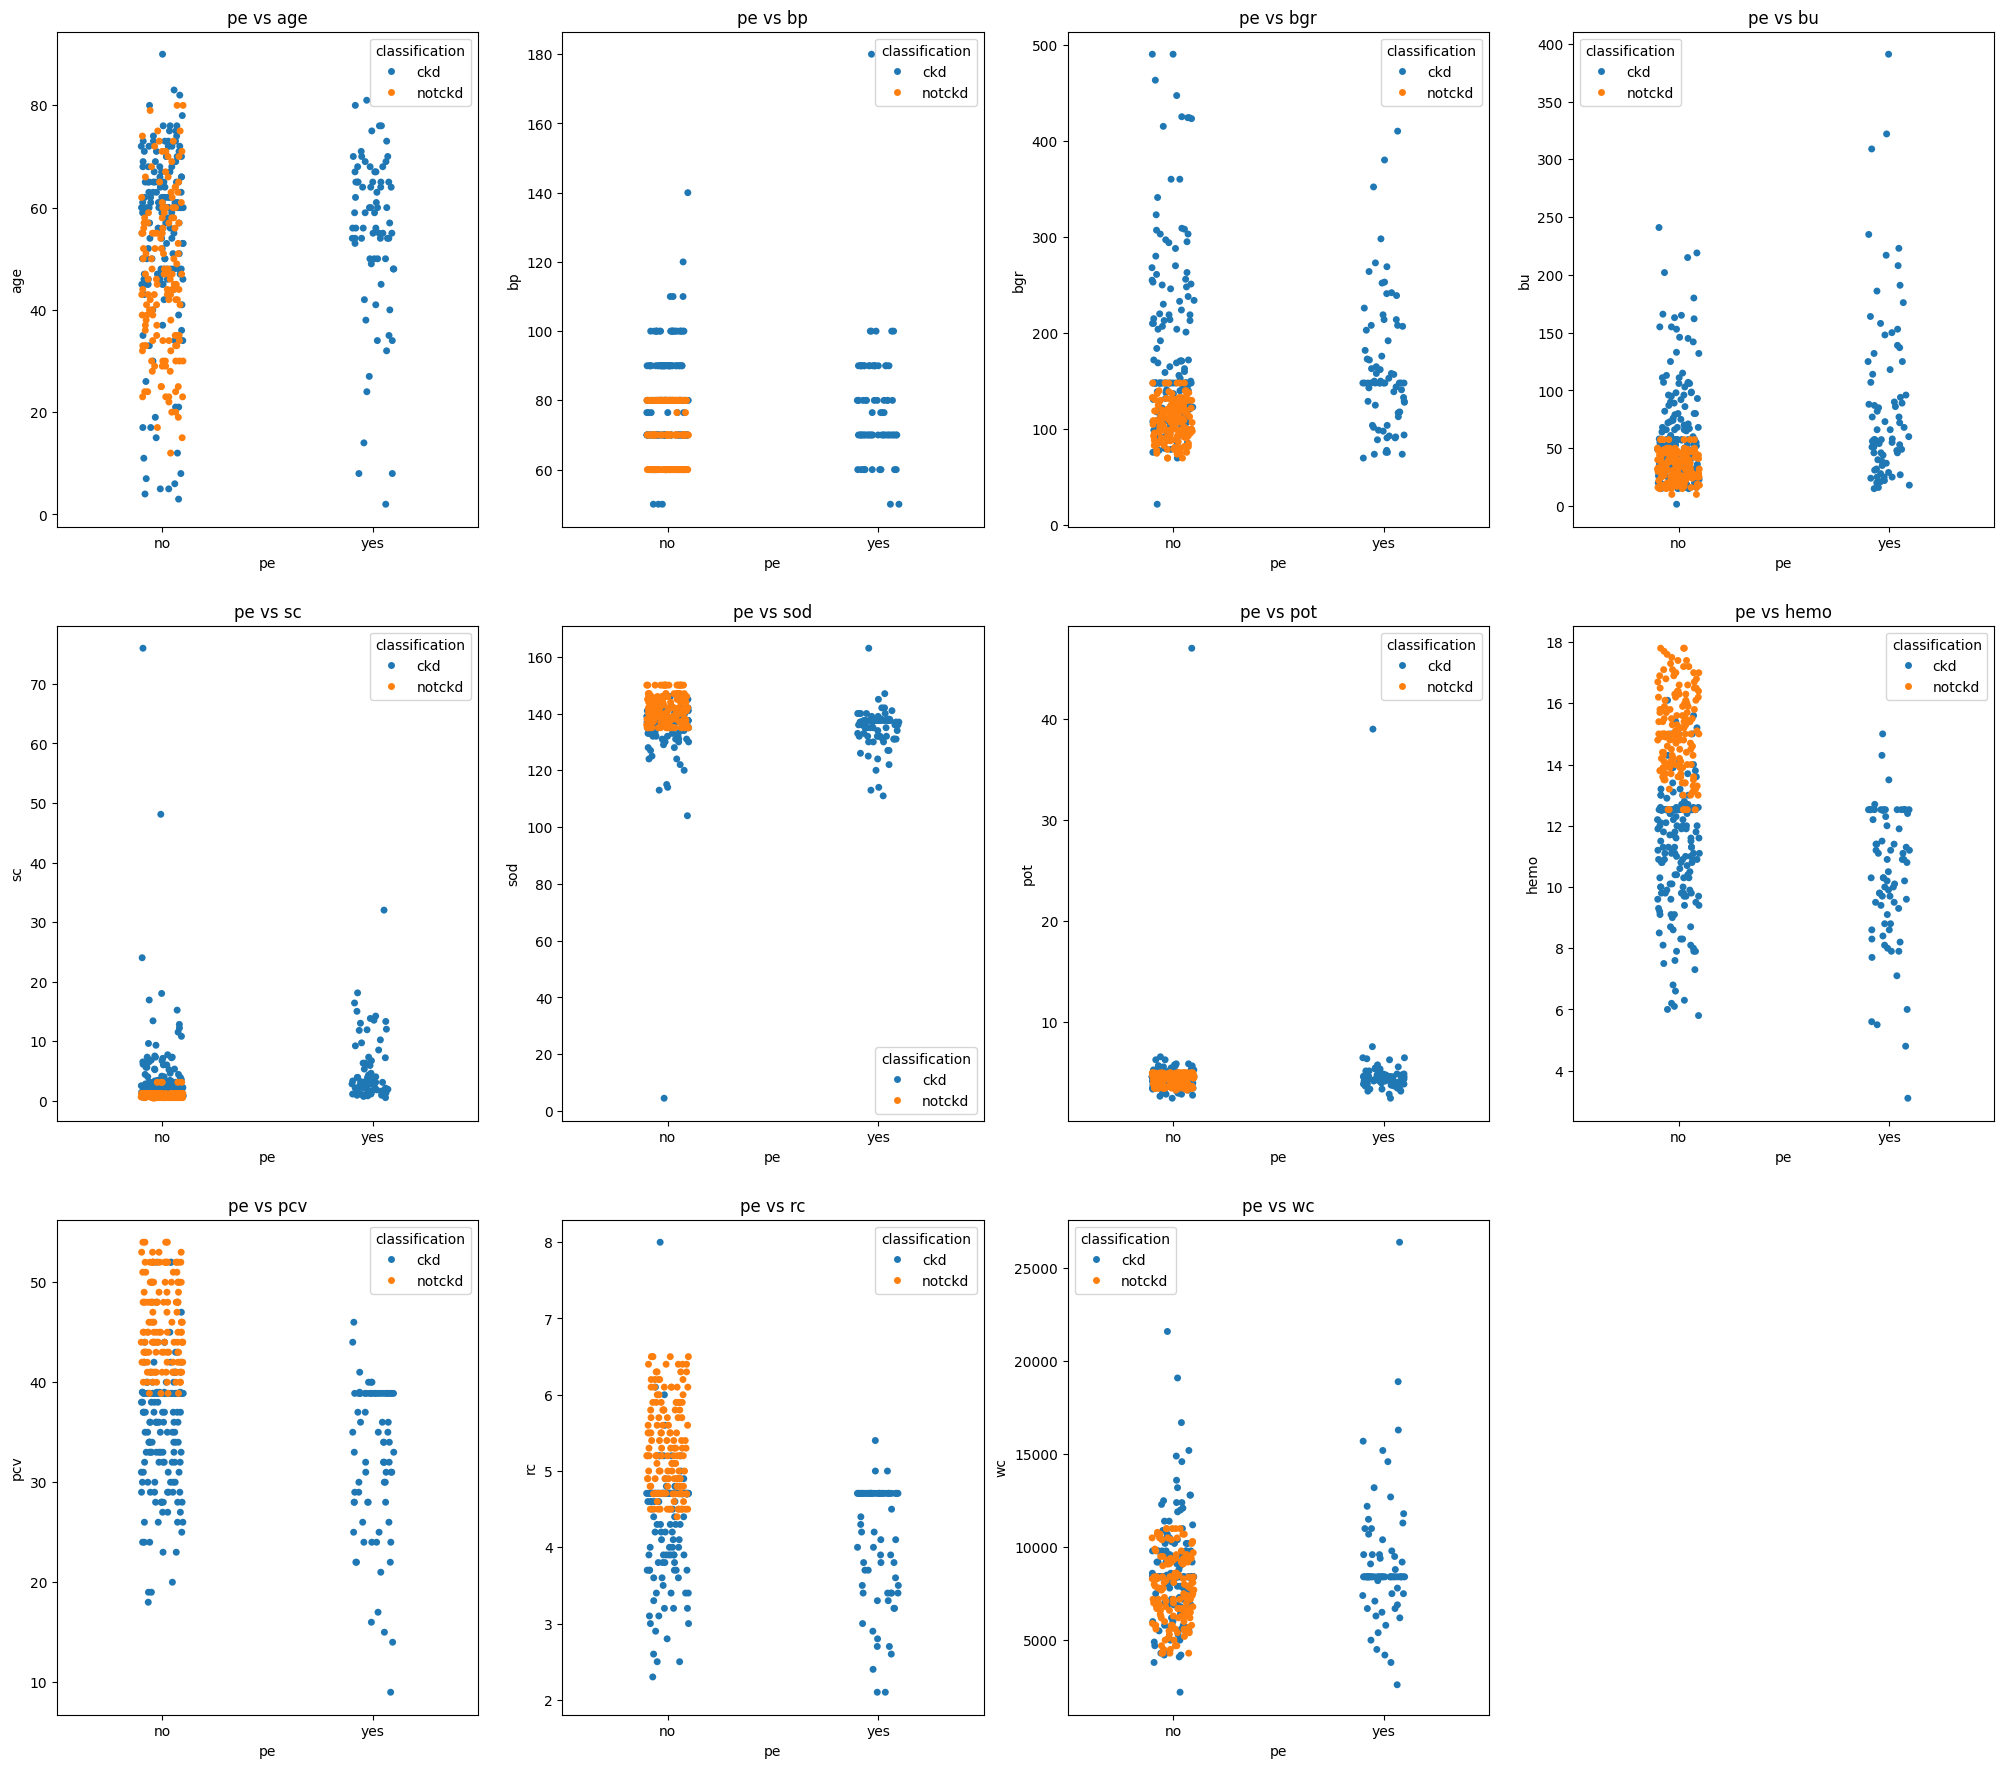

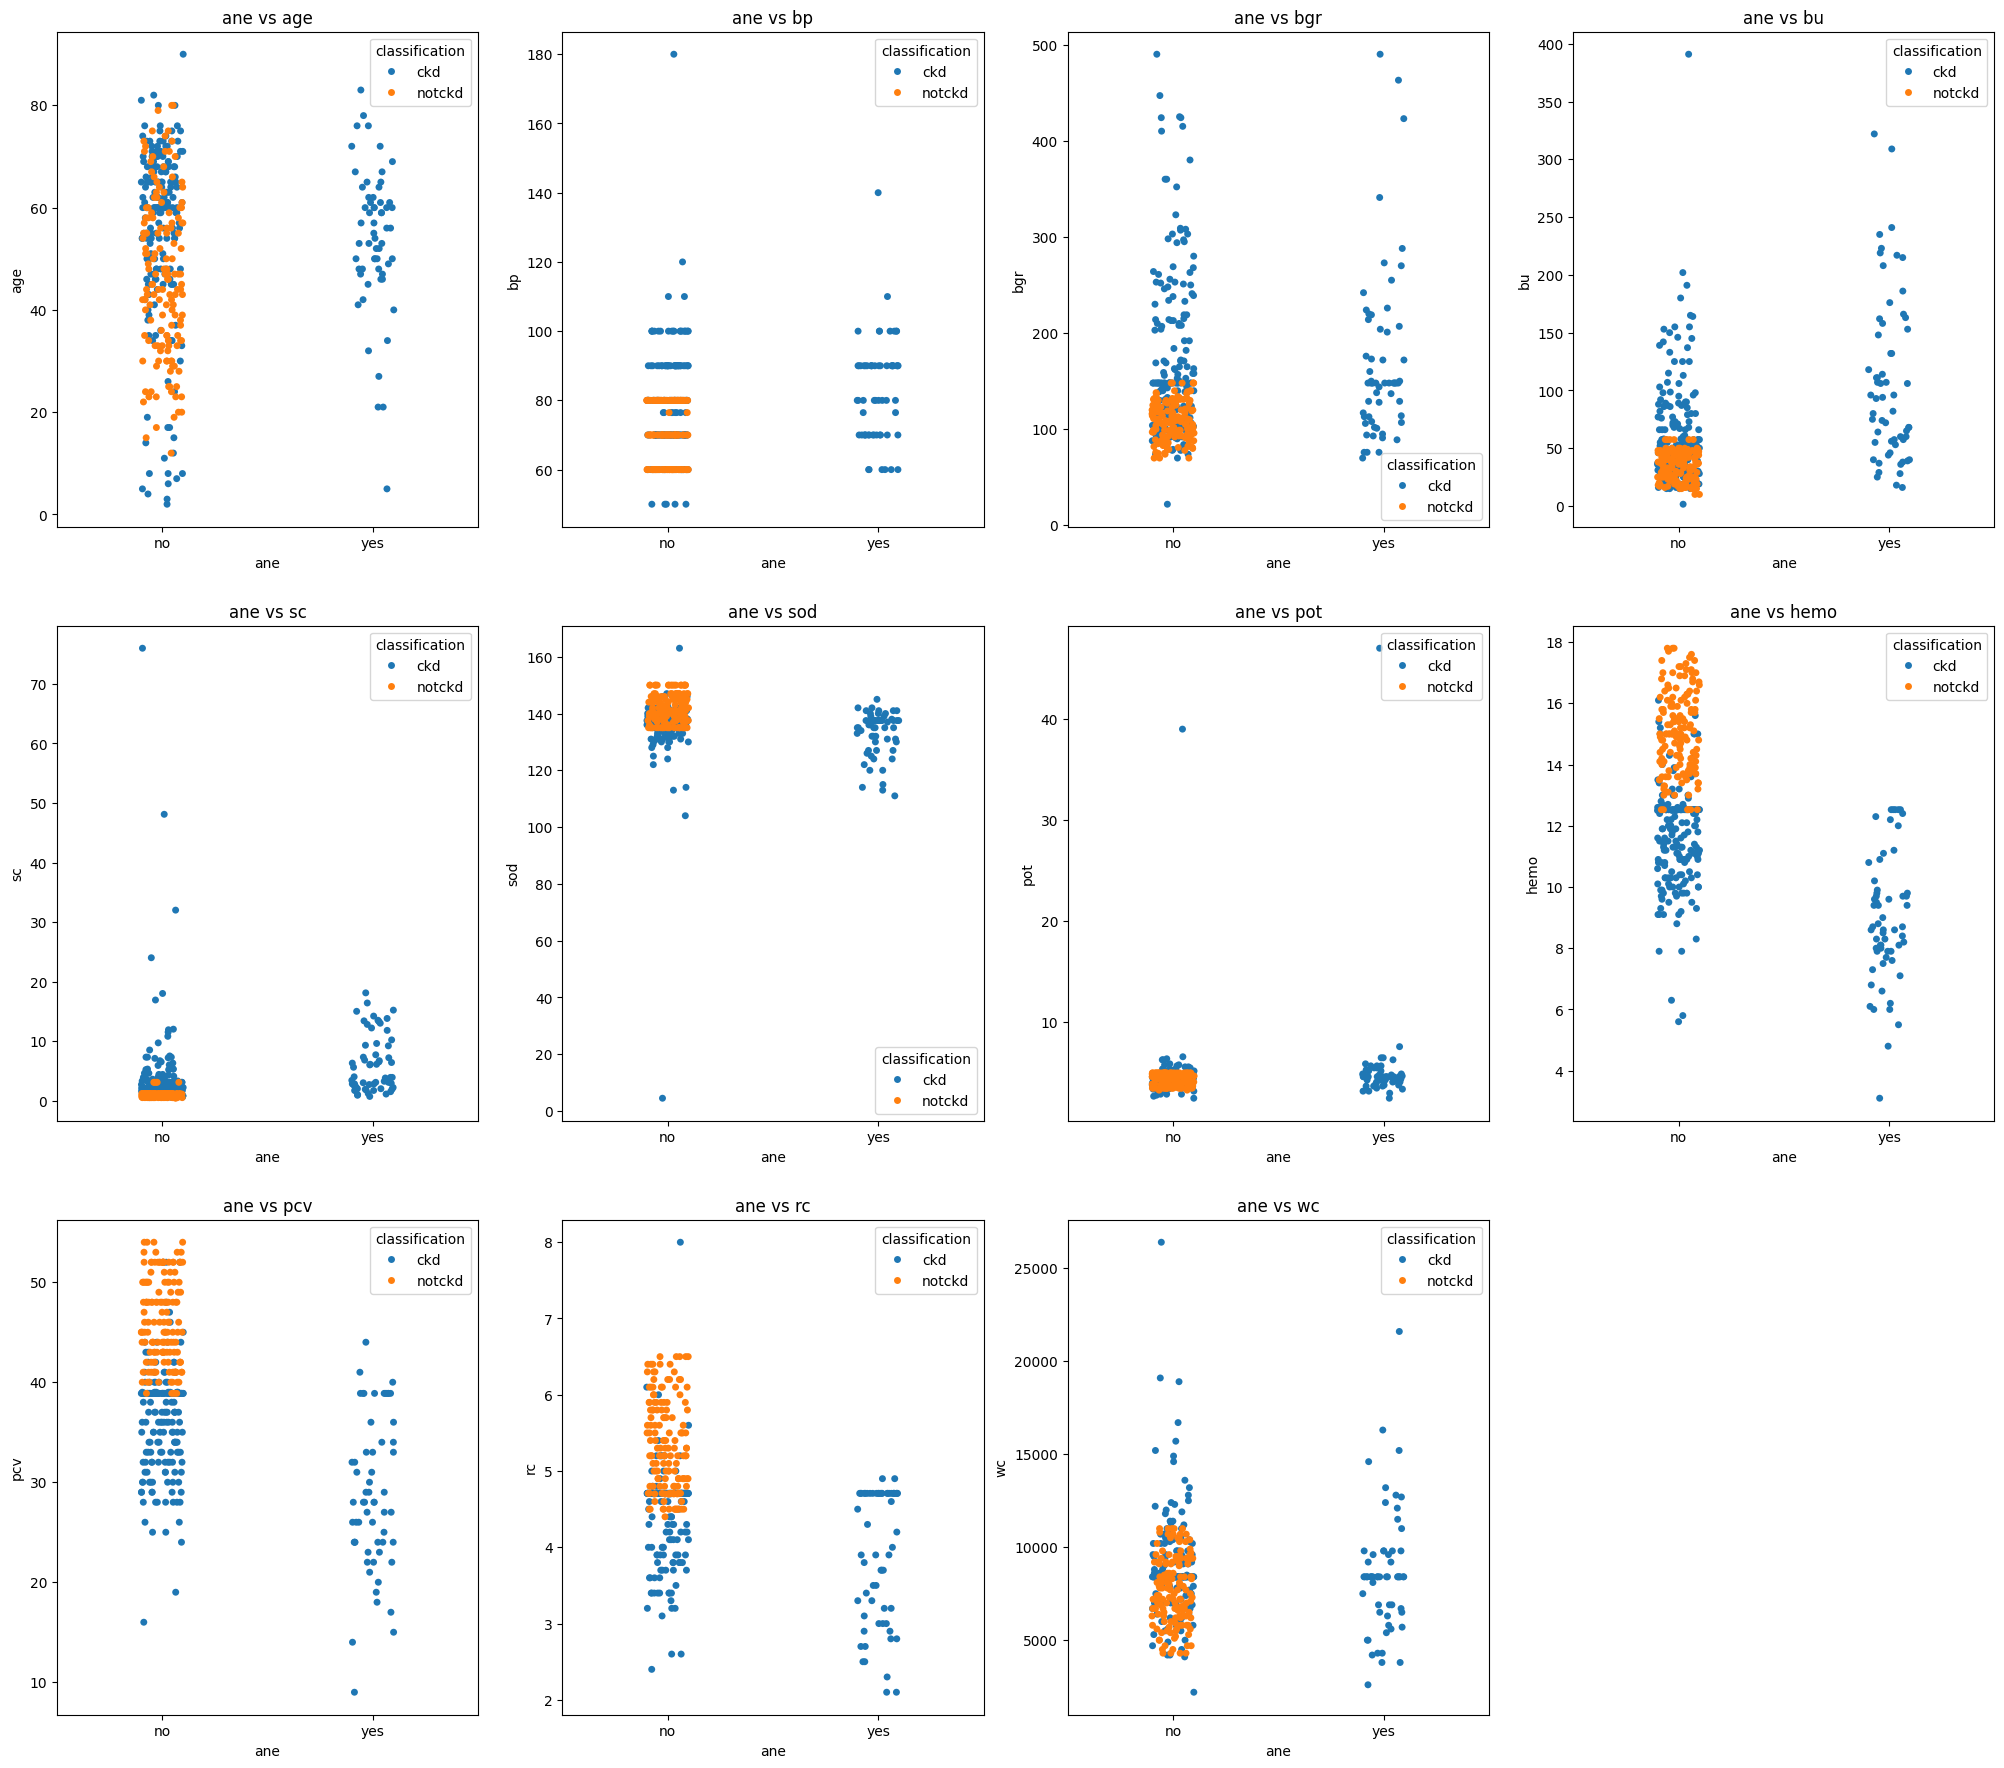

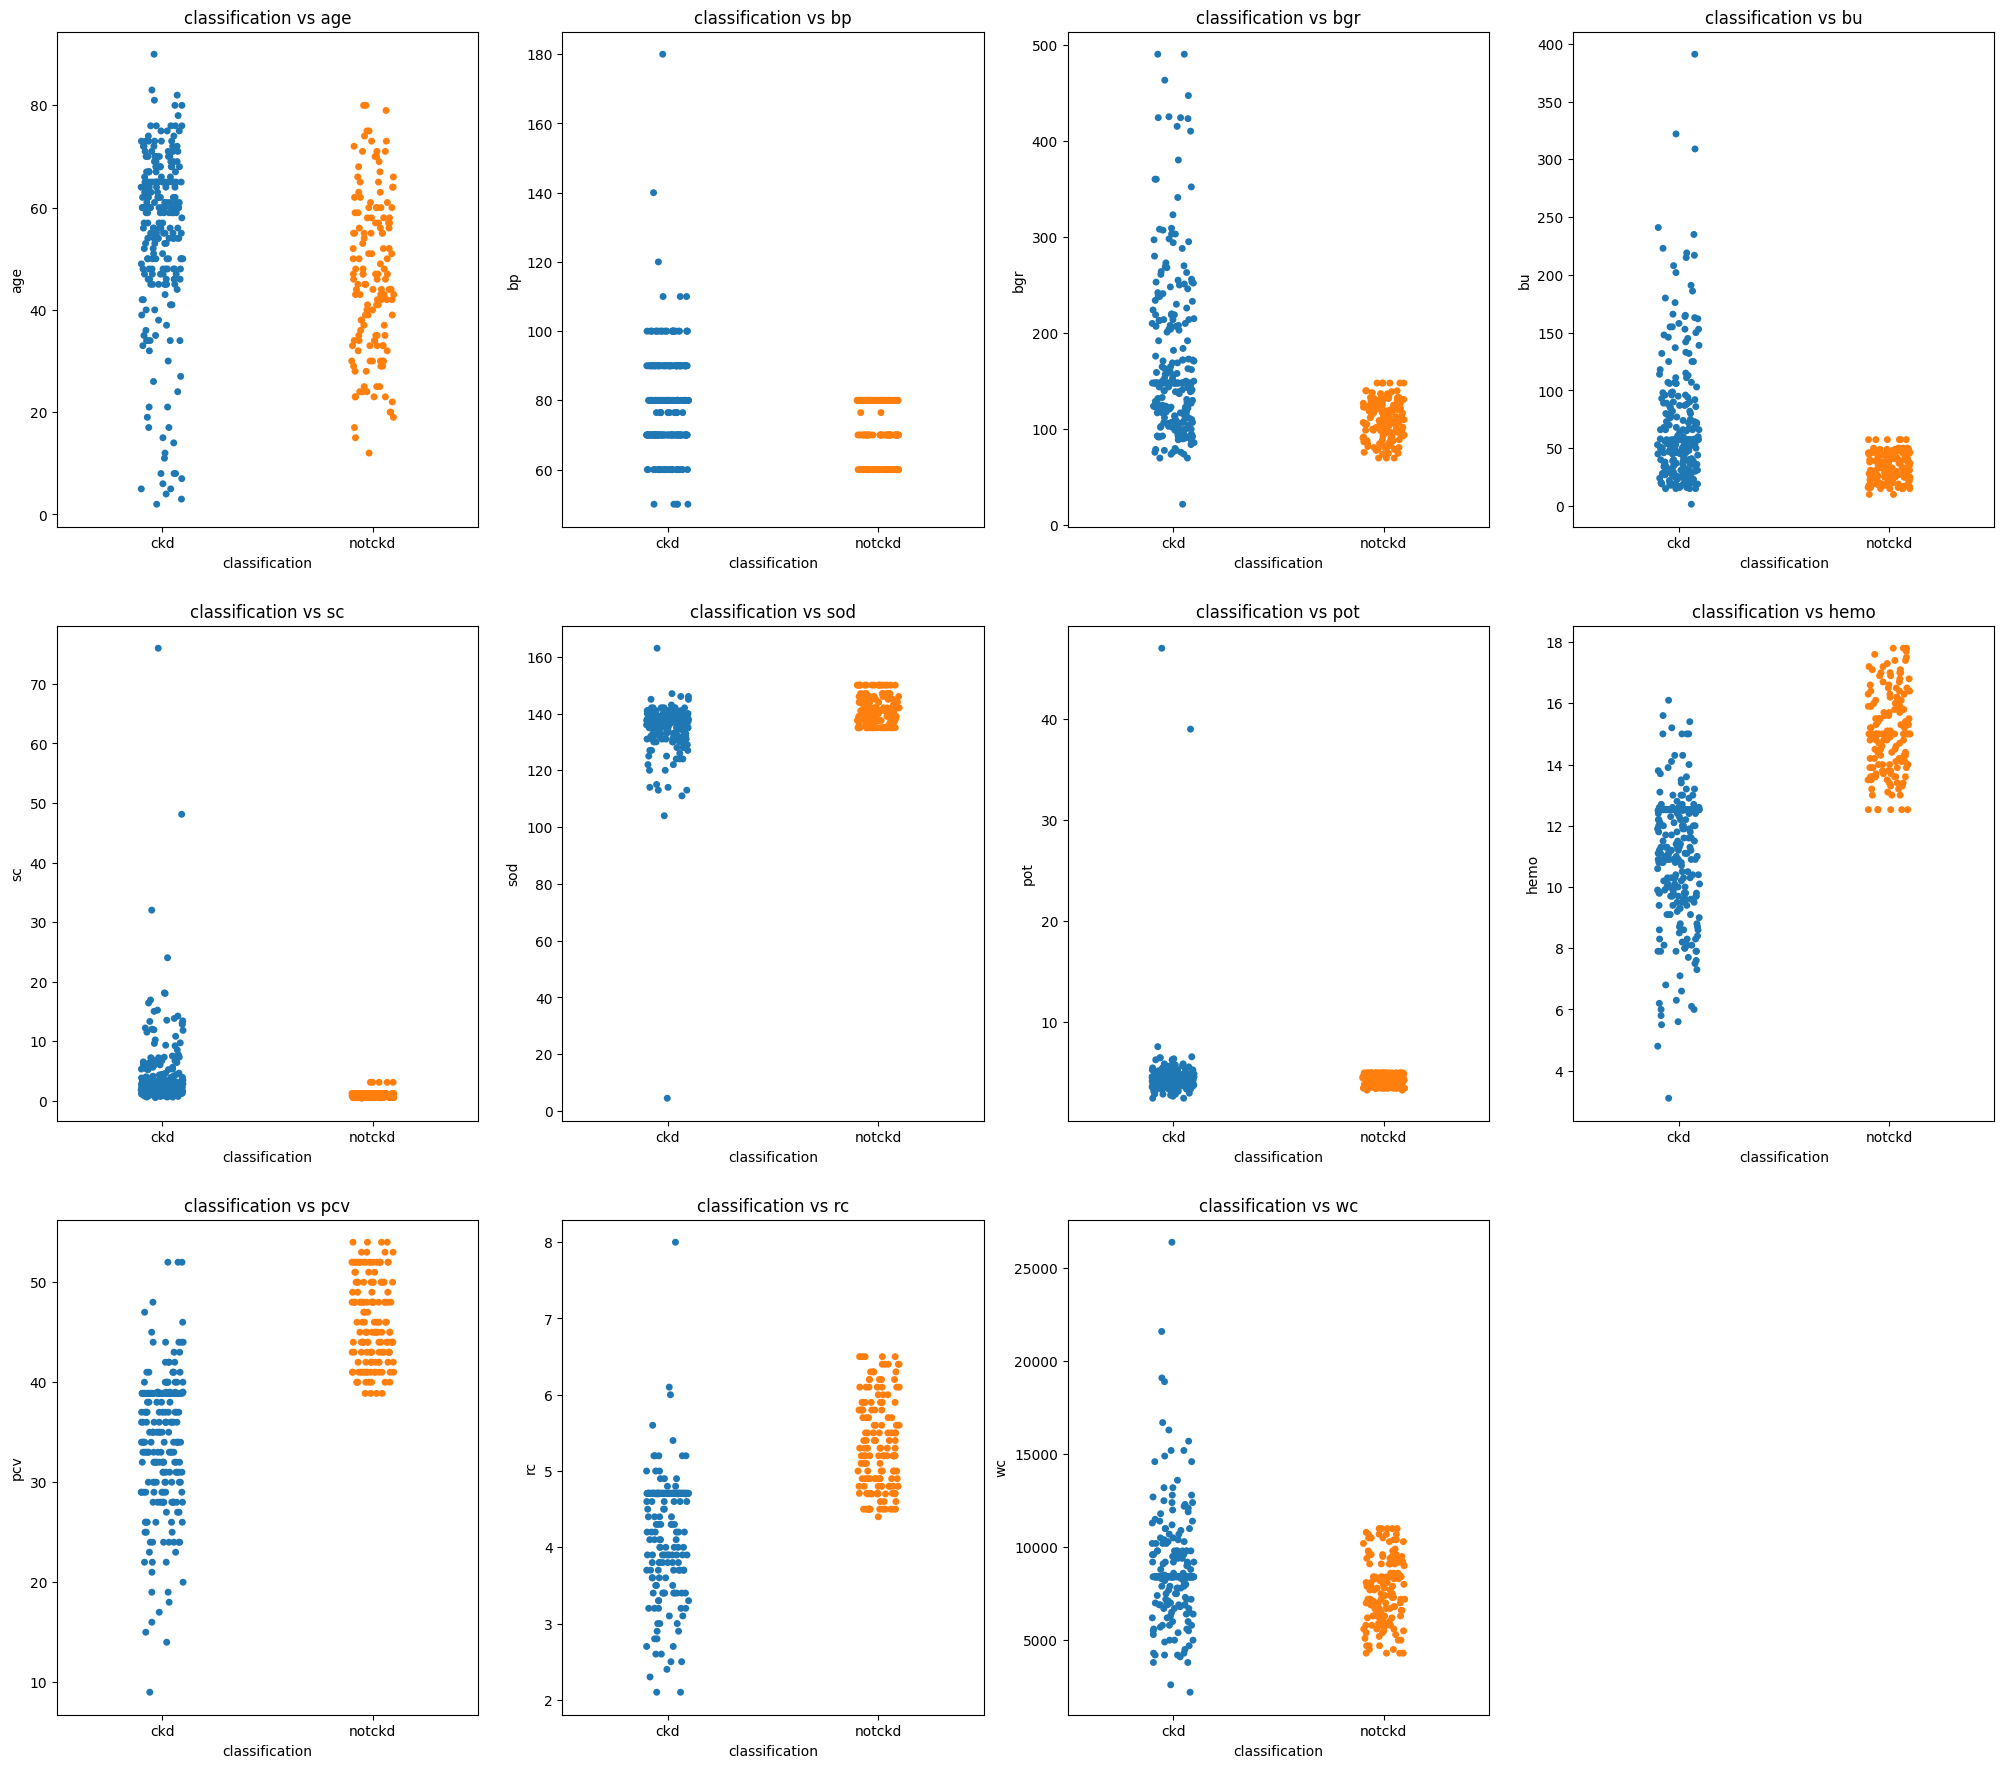

In [21]:
numerical_features=list(Continuous['Continuous Columns'])
columns = list(kidney_data.columns)
for i in columns:
  row=6
  col=4
  if kidney_data[i].dtype=='object':
    plt_counter=1
    plt.figure(figsize=(25,45))
    for j in numerical_features:
      plt.subplot(row,col,plt_counter)
      sns.stripplot(data=kidney_data,x=i,y=j,hue='classification')
      plt.title(f'{i} vs {j}' )
      plt_counter+=1
    plt.show()
    row+=1

__Observations:__ The correlation coefficient of some _categorical_ features with _continuous_ features is very low

**_Note: Multivariate Analysis of dataset using heatmap is carried out after Label encoding(Step 7) since correlation demands all features to be of float type_**

##### __Step: 7__ Label Encoding of Categorical features
Encoding Categorical values into numerical values using `LabelEncoder`

In [22]:
label_enc=LabelEncoder()
classes={}
for i in categorical.iloc[:]['Categorical Columns']:
    kidney_data[i] = label_enc.fit_transform(kidney_data[i])
    classes[f"{i}"]=label_enc.classes_
kidney_data.head()

age    bp  sg  al  su  rbc  pc  pcc  ba         bgr  ...   pcv      wc  \
0  48.0  80.0   3   1   0    1   1    0   0  121.000000  ...  44.0  7800.0   
1   7.0  50.0   3   4   0    1   1    0   0  148.036517  ...  38.0  6000.0   
2  62.0  80.0   1   2   3    1   1    0   0  423.000000  ...  31.0  7500.0   
3  48.0  70.0   0   4   0    1   0    1   0  117.000000  ...  32.0  6700.0   
4  51.0  80.0   1   2   0    1   1    0   0  106.000000  ...  35.0  7300.0   

         rc  htn  dm  cad  appet  pe  ane  classification  
0  5.200000    1   1    0      0   0    0               0  
1  4.707435    0   0    0      0   0    0               0  
2  4.707435    0   1    0      1   0    1               0  
3  3.900000    1   0    0      1   1    1               0  
4  4.600000    0   0    0      0   0    0               0  

[5 rows x 25 columns]

__Multivariate Analysis__

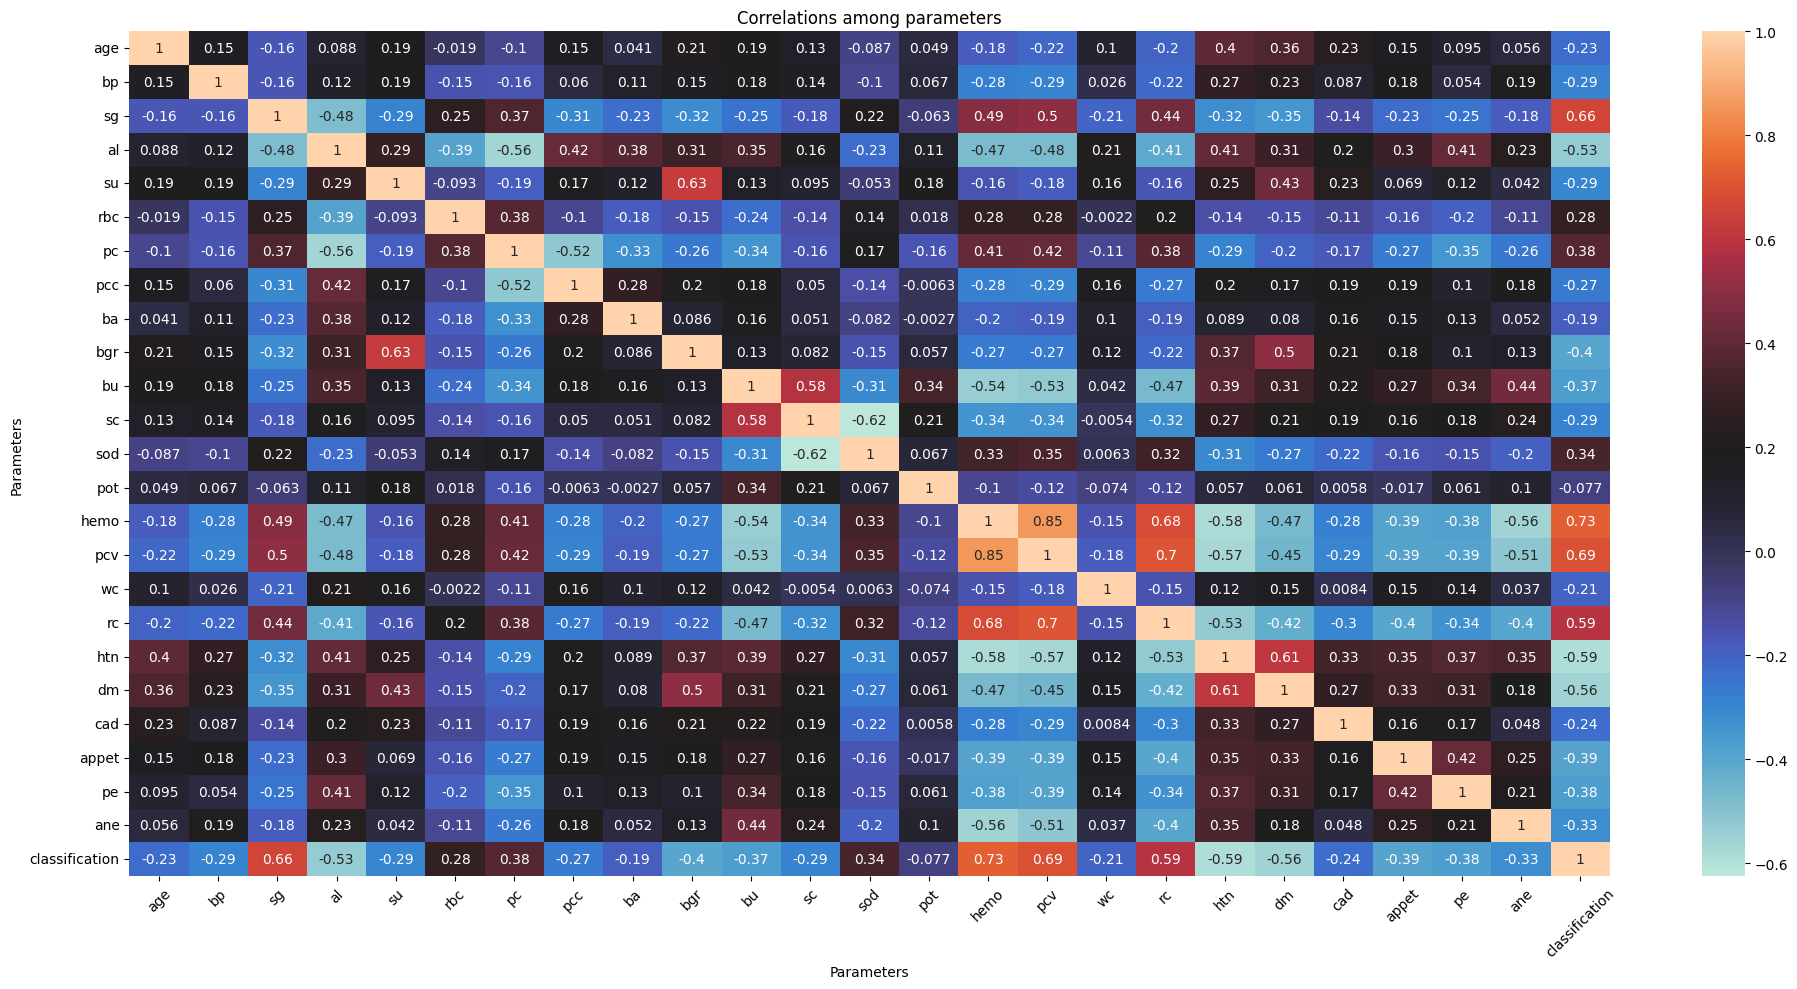

In [23]:
plt.figure(figsize=(20,10))
correlations=kidney_data.corr()
sns.heatmap(correlations,annot=True,cmap='icefire')
plt.xlabel("Parameters")
plt.ylabel("Parameters")
plt.title("Correlations among parameters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__Observations:__ From the heatmap, it is observed that `pcv` and `hemo` have 85% multicollinearity. Hence, we will drop `pcv`from the dataset

In [24]:
kidney_data.drop(columns = ['pcv'],inplace=True)

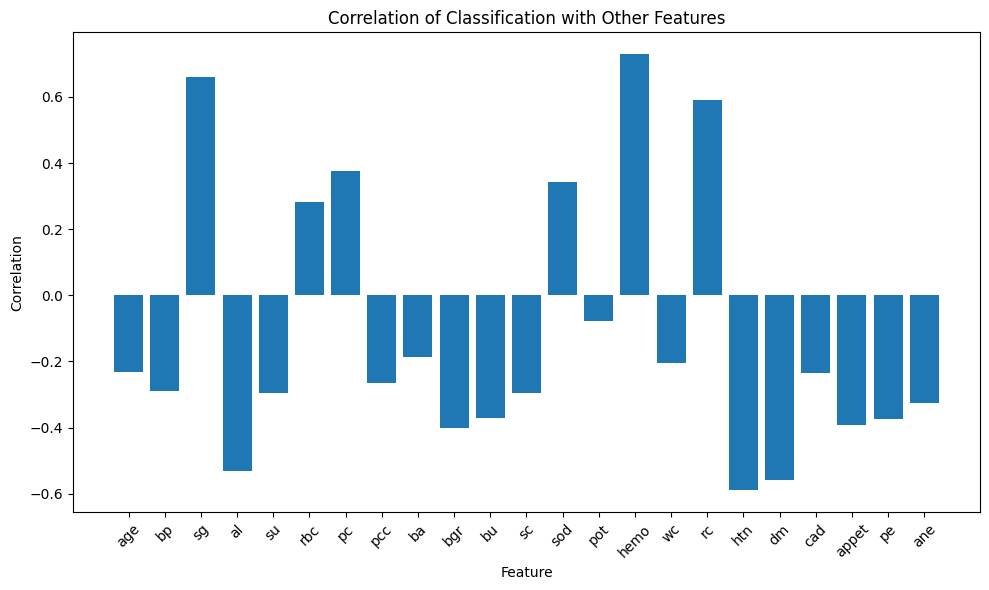

In [25]:
correlation_dict = {}
for col in kidney_data.drop(columns=['classification']).columns:
  correlation_dict[col] = kidney_data['classification'].corr(kidney_data[col])
correlation_values = list(correlation_dict.values())
column_names = list(correlation_dict.keys())
plt.figure(figsize=(10, 6))
plt.bar(column_names, correlation_values)
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation of Classification with Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
kidney_data.to_csv('kidney_data_processed.csv')

<hr>

Now that all the values are of numeric dtype, we will create a Synthethic dataset from the real dataset using `copulas` library to reduce overfitting to a certain extent

In [26]:
copula = GaussianMultivariate()
copula.fit(kidney_data)
synthetic_data = copula.sample(200)

Altering value types in `synthetic_data` to match `kidney_data`

In [27]:
synthetic_data.age = round(abs(synthetic_data.age)).astype('float64')
synthetic_data.bp =round(abs(synthetic_data.bp)).astype('float64')
synthetic_data.sg =round(abs(synthetic_data.sg)).astype('int64')
synthetic_data.su =round(abs(synthetic_data.su)).astype('int64')
synthetic_data.al =round(abs(synthetic_data.al)).astype('int64')
synthetic_data.pcc =round(abs(synthetic_data.pcc)).astype('int64')
synthetic_data.rbc =round(abs(synthetic_data.rbc)).astype('int64')
synthetic_data.pc =round(abs(synthetic_data.pc)).astype('int64')
synthetic_data.ba =round(abs(synthetic_data.ba)).astype('int64')
synthetic_data.bgr =round(abs(synthetic_data.bgr)).astype('float64')
synthetic_data.bu =round(abs(synthetic_data.bu)).astype('float64')
synthetic_data.sc =round(abs(synthetic_data.sc)).astype('float64')
synthetic_data.sod =round(abs(synthetic_data.sod)).astype('float64')
synthetic_data.pot =round(abs(synthetic_data.pot)).astype('float64')
synthetic_data.hemo =round(abs(synthetic_data.hemo)).astype('float64')
synthetic_data.wc = round(abs(synthetic_data.wc)).astype('float64')
synthetic_data.rc =round(abs(synthetic_data.rc)).astype('float64')
synthetic_data.htn =round(abs(synthetic_data.htn)).astype('int64')
synthetic_data.dm =round(abs(synthetic_data.dm)).astype('int64')
synthetic_data.cad =round(abs(synthetic_data.cad)).astype('int64')
synthetic_data.appet =round(abs(synthetic_data.appet)).astype('int64')
synthetic_data.pe =round(abs(synthetic_data.pe)).astype('int64')
synthetic_data.ane =round(abs(synthetic_data.ane)).astype('int64')
synthetic_data.classification =round(abs(synthetic_data.classification)).astype('int64')

In [28]:
synthetic_data.to_csv("synthetic_data.csv",index=False) #Saving synthetic data once a good quality synthetic data is generated

In [29]:
#synthetic_data = pd.read_csv('synthetic_data.csv')  #Reading only when good quality synthetic data is generated and saved

__Heat Map of Synthetic Dataset__

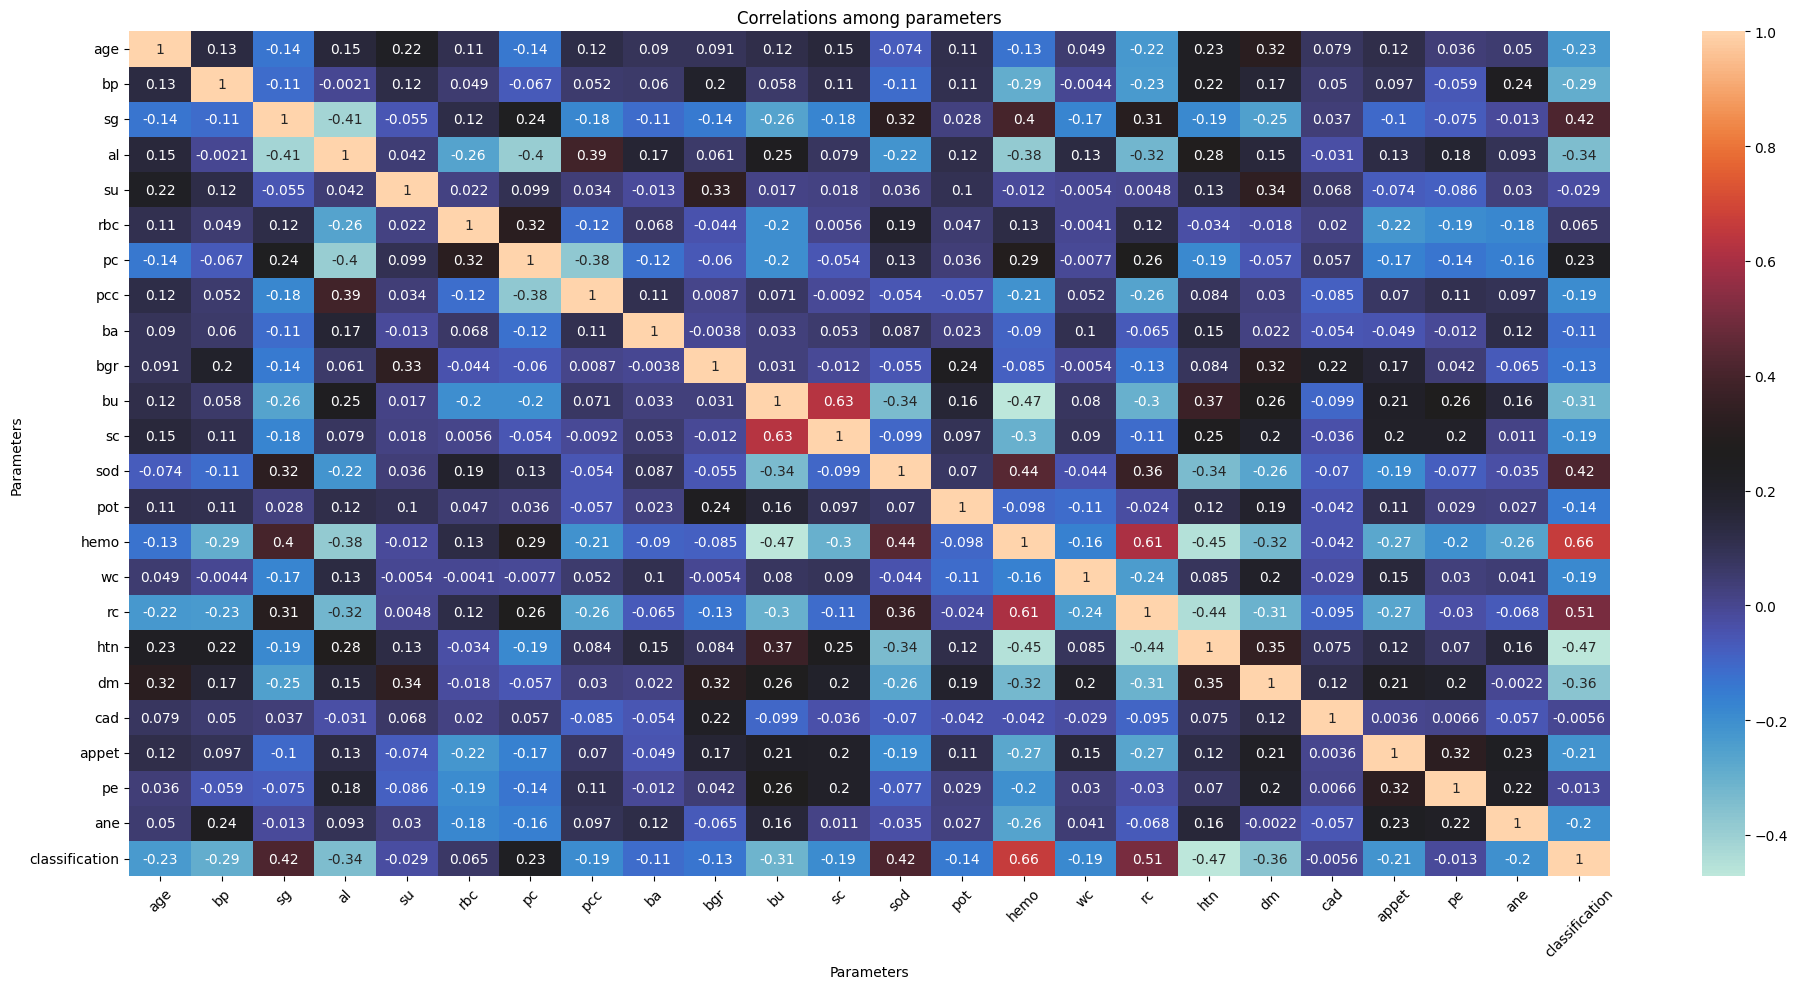

In [30]:
plt.figure(figsize=(20,10))
correlations=synthetic_data.corr()
sns.heatmap(correlations,annot=True,cmap='icefire')
plt.xlabel("Parameters")
plt.ylabel("Parameters")
plt.title("Correlations among parameters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### __Step: 8__ Splitting the Dataset into Independent and Dependent Variable
X - Independant Variables <br>
Y - Target/Dependent Variable

In [31]:
columns = list(kidney_data.columns)
columns.remove('classification')

__Splitting Training and Testing dataset__<br> `merged_kidney_data` will be used for training the model using cross-validation technique and `test_data` will be the unseen data tested upon to assess the genralizing ability of the model.

In [32]:
merged_kidney_data = pd.concat([kidney_data,synthetic_data])
test_size = int(0.2*(merged_kidney_data.shape[0]))
test_data = merged_kidney_data.sample(test_size,random_state=42)
merged_kidney_data.drop(test_data.index,inplace=True)

In [33]:
Xtest = test_data.drop("classification",axis=1)
ytest = test_data['classification']

Handling imbalance issue of `merged_kidney_data` using SMOTE

In [34]:
X = merged_kidney_data.drop("classification", axis=1)
y = merged_kidney_data["classification"]
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X, y)

In [35]:
print(y.value_counts())
print(y_resampled.value_counts())

classification
0    239
1    179
Name: count, dtype: int64
classification
0    239
1    239
Name: count, dtype: int64


In [36]:
print(X_resampled.shape)
print(y_resampled.shape)

(478, 23)
(478,)


In [37]:
kf=KFold(n_splits=25,random_state=42,shuffle=True) #KFold object
Accuracy,All_prec,All_rec,test_accuracy,test_recall,test_precision = {},{},{},{},{},{} #Dictionaries to store corresponding values for final analysis

##### __STEP: 9__  Model Developemnt

## Model: Random Forest Classification


__Initial Model__

In [38]:
rfc = RandomForestClassifier() 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,train_size=0.8,random_state=42)
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)*100:.4f}%')

Accuracy:91.6667%


In [40]:
y_pred = rfc.predict(Xtest)
print(f'Unseen Data Accuracy:{accuracy_score(ytest,y_pred)*100:.4f}%')
print(f'Unseen Data recall:{recall_score(ytest,y_pred)*100:.4f}%')

Unseen Data Accuracy:95.0000%
Unseen Data recall:88.8889%


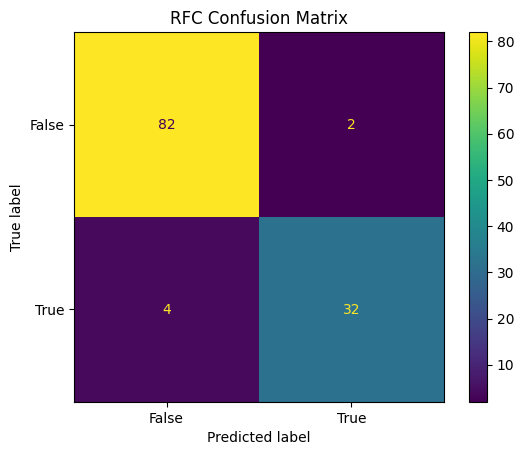

In [41]:
confusion_mat = confusion_matrix(ytest,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title("RFC Confusion Matrix")
plt.show()

In [42]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.94      0.89      0.91        36

    accuracy                           0.95       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.95      0.95      0.95       120



Hyperparameter tuning using _GridSearchCV_ (estimated run-time: 30-50 mins)

In [48]:
param_dist = {
    'n_estimators': [10, 50, 100, 1000],
    'max_depth':[3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [49]:
grid_search = GridSearchCV(estimator=rfc,param_grid=param_dist,scoring="accuracy",cv=10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [10, 50, 100, 1000]},
             scoring='accuracy')

Getting the best parameters for the model

In [50]:

best_params = grid_search.best_params_
max_depth = best_params['max_depth']
n_estimators = best_params['n_estimators']
min_sample_split = best_params['min_samples_split']
min_sample_leaf = best_params['min_samples_leaf']
best_params

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [51]:
best_rfc=RandomForestClassifier(n_estimators=n_estimators,min_samples_split=min_sample_split, min_samples_leaf=min_sample_leaf,max_depth=max_depth)
rfe_rfc = RFECV(best_rfc,min_features_to_select=20,cv=kf,step=1)

In [52]:
scores=[]
precision= []
recall = []
for train_index, test_index in kf.split(X_resampled,y_resampled):
  X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
  y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
  rfe_rfc.fit(X_train, y_train)
  y_pred=rfe_rfc.predict(X_test)
  prec = precision_score(y_test,y_pred)
  rec = recall_score(y_test,y_pred)
  score = accuracy_score(y_test,y_pred)
  precision.append(prec)
  recall.append(rec)
  scores.append(score)
  print(f'Fold Score: {score}')

Fold Score: 0.95
Fold Score: 0.95
Fold Score: 0.8
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 1.0
Fold Score: 0.8947368421052632
Fold Score: 1.0
Fold Score: 0.8947368421052632
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 0.7894736842105263
Fold Score: 0.8947368421052632
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 1.0


In [53]:
average_score = sum(scores) / len(scores)
average_precision = sum(precision)/len(precision)
average_recall = sum(recall)/len(recall)
Accuracy['Random Forest'] = average_score
All_prec['Random Forest'] = average_precision
All_rec['Random Forest'] = average_recall
print(f'Average Cross-Validation Score: {average_score*100:.4f}')
print(f'Average Precision score: {average_precision*100:.4f}')
print(f'Average Recall score: {average_recall*100:.4f}')

Average Cross-Validation Score: 93.9579
Average Precision score: 94.5841
Average Recall score: 93.5202


In [54]:
y_pred = rfe_rfc.predict([[45,90,1,0,1,1,0,0,0,230,57,0,140,6,20,3700,0,0,0,1,0,0,0]])
print(y_pred)

[0]


Testing optimized model on unseen data

In [55]:
y_pred=rfe_rfc.predict(Xtest)
test_accuracy['Random Forest'] = accuracy_score(ytest,y_pred)
test_recall['Random Forest'] = recall_score(ytest,y_pred)
test_precision['Random Forest'] = precision_score(ytest,y_pred)

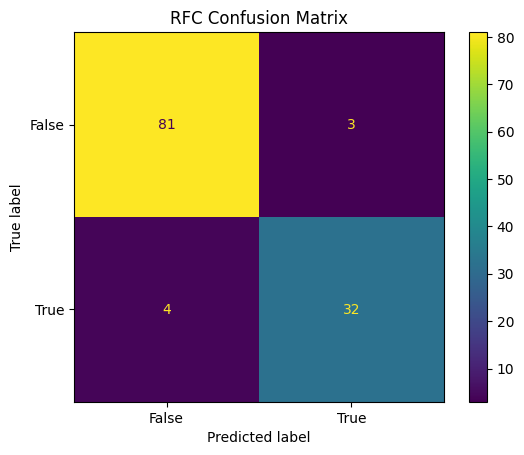

In [56]:
confusion_mat=confusion_matrix(ytest,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title('RFC Confusion Matrix')
plt.show()

In [57]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        84
           1       0.91      0.89      0.90        36

    accuracy                           0.94       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.94      0.94      0.94       120



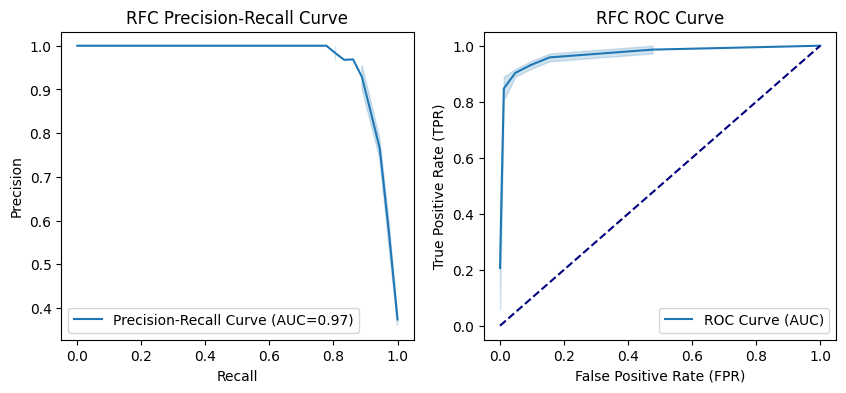

In [58]:
yscore = rfe_rfc.predict_proba(Xtest)[:,1]
plt.figure(figsize=(10,4))
precision, recall, thresholds = precision_recall_curve(ytest, yscore)
auc_score=auc(recall,precision)
plt.subplot(1,2,1)
sns.lineplot(x=recall, y=precision, label=f'Precision-Recall Curve (AUC={auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RFC Precision-Recall Curve')
fpr, tpr, thresholds = roc_curve(ytest, yscore)
plt.subplot(1,2,2)
sns.lineplot(x=fpr, y=tpr, label='ROC Curve (AUC)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('RFC ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

## Model: Logistic Regression

__Initial Model__

In [59]:
lr = LogisticRegression()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)*100:.4f}%')

Accuracy:89.5833%


In [61]:
y_pred = lr.predict(Xtest)
print(f'Unseen Data Accuracy:{accuracy_score(ytest,y_pred)*100:.4f}%')
print(f'Unseen Data Recall:{recall_score(ytest,y_pred)*100:.4f}%')

Unseen Data Accuracy:92.5000%
Unseen Data Recall:94.4444%


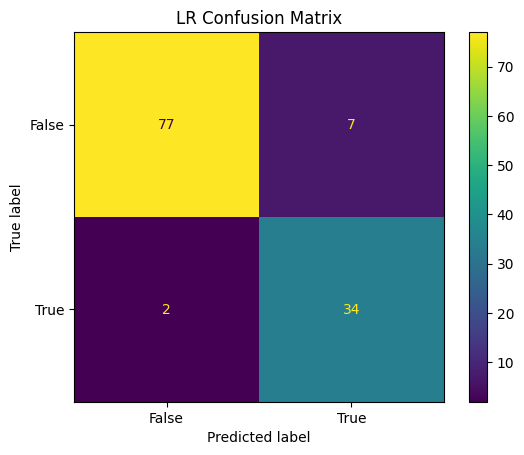

In [62]:
confusion_mat = confusion_matrix(ytest,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title("LR Confusion Matrix")
plt.show()

In [63]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        84
           1       0.83      0.94      0.88        36

    accuracy                           0.93       120
   macro avg       0.90      0.93      0.91       120
weighted avg       0.93      0.93      0.93       120



Hyperparameter tuning using _GridSearchCV_ (estimated run-time: 30 secs)

In [64]:
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [65]:
grid_search = GridSearchCV(estimator=lr,param_grid=param_dist,scoring='accuracy',cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [66]:
best_params = grid_search.best_params_
C = best_params['C']
Solver = best_params['solver']
best_lr = LogisticRegression(C=C,solver=Solver)
rfe_lr = RFECV(best_lr,min_features_to_select=20,cv=kf,step=1)

In [67]:
scores=[]
precision =[]
recall = []
for train_index, test_index in kf.split(X_resampled,y_resampled):
  X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
  y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
  rfe_lr.fit(X_train, y_train)
  y_pred=rfe_lr.predict(X_test)
  prec = precision_score(y_test,y_pred)
  rec = recall_score(y_test,y_pred)
  score = rfe_lr.score(X_test, y_test)
  scores.append(score)
  precision.append(prec)
  recall.append(rec)
  print(f'Fold Score: {score}')

Fold Score: 0.9
Fold Score: 0.8
Fold Score: 0.85
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 0.8947368421052632
Fold Score: 0.8947368421052632
Fold Score: 0.8421052631578947
Fold Score: 0.8947368421052632
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632


In [68]:
average_score = sum(scores) / len(scores)
average_precision = sum(precision)/len(precision)
average_recall = sum(recall)/len(recall)
Accuracy['Linear Regression'] = average_score
All_prec['Linear Regression'] = average_precision
All_rec['Linear Regression '] = average_recall
print(f'Average Cross-Validation Score: {average_score*100:.4f}')
print(f'Average Precision score: {average_precision*100:.4f}')
print(f'Average Recall score: {average_recall*100:.4f}')

Average Cross-Validation Score: 92.9368
Average Precision score: 91.9162
Average Recall score: 94.6172


In [69]:
y_pred = rfe_lr.predict([[45,90,1,0,1,1,0,0,0,230,57,0,140,6,20,3700,0,0,0,1,0,0,0]])
print(y_pred)

[1]


Testing optimized model on unseen data

In [70]:
y_pred= rfe_lr.predict(Xtest)
test_accuracy['Logistic Regression'] = accuracy_score(ytest,y_pred)
test_recall['Logistic Regression'] = recall_score(ytest,y_pred)
test_precision['Logistic Regression'] = precision_score(ytest,y_pred)

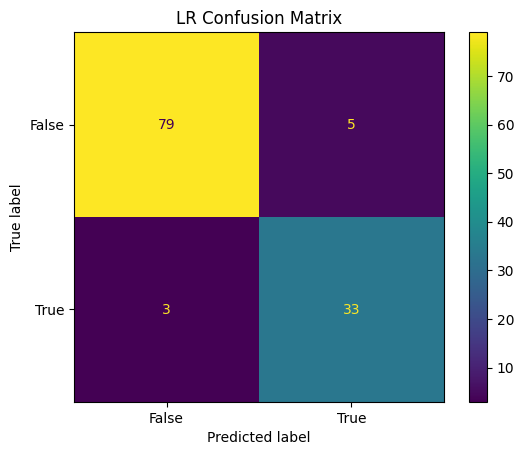

In [71]:
confusion_mat=confusion_matrix(y_pred=y_pred,y_true=ytest)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title('LR Confusion Matrix')
plt.show()

In [72]:
print(classification_report(y_pred=y_pred,y_true=ytest))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        84
           1       0.87      0.92      0.89        36

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



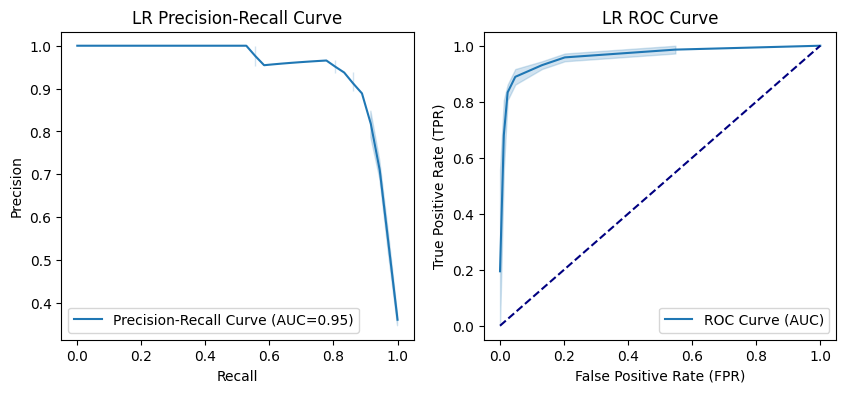

In [73]:
yscore = rfe_lr.predict_proba(Xtest)[:,1]
plt.figure(figsize=(10,4))
precision, recall, thresholds = precision_recall_curve(ytest, yscore)
auc_score = auc(recall,precision)
plt.subplot(1,2,1)
sns.lineplot(x=recall, y=precision, label=f'Precision-Recall Curve (AUC={auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LR Precision-Recall Curve')
fpr, tpr, thresholds = roc_curve(ytest, yscore)
plt.subplot(1,2,2)
sns.lineplot(x=fpr, y=tpr, label='ROC Curve (AUC)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('LR ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

## Model: Decision Tree Classifier

__Initial Model__

In [74]:
dt= DecisionTreeClassifier()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)*100:.4f}%')

Accuracy:87.5000%


In [76]:
y_pred = dt.predict(Xtest)
print(f'Unseen Data Accuracy:{accuracy_score(ytest,y_pred)*100:.4f}%')
print(f'Unseen Data Recall:{recall_score(ytest,y_pred)*100:.4f}%')

Unseen Data Accuracy:94.1667%
Unseen Data Recall:86.1111%


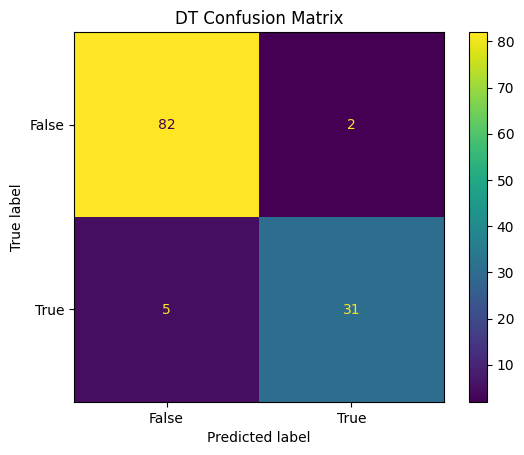

In [77]:
confusion_mat = confusion_matrix(ytest,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title("DT Confusion Matrix")
plt.show()

In [78]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.94      0.86      0.90        36

    accuracy                           0.94       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.94      0.94      0.94       120



Hyperparameter tuning using _GridSearchCV_ (estimated run-time: 30 secs)

In [79]:
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [80]:
grid_search = GridSearchCV(estimator=dt,param_grid=param_dist,scoring="accuracy",cv=10)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [81]:
best_params = grid_search.best_params_
min_sample_split = best_params['min_samples_split']
min_sample_leaf = best_params['min_samples_leaf']
max_features = best_params['max_features']
max_depth=best_params['max_depth']
best_dt=DecisionTreeClassifier(min_samples_split=min_sample_split, min_samples_leaf=min_sample_leaf,max_features=max_features,max_depth=max_depth)
rfe_dt = RFECV(best_dt,min_features_to_select=20,cv=kf,step=1)

In [82]:
scores=[]
precision = []
recall=[]
for train_index, test_index in kf.split(X_resampled,y_resampled):
  X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
  y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
  rfe_dt.fit(X_train, y_train)
  y_pred=rfe_dt.predict(X_test)
  score = accuracy_score(y_test,y_pred)
  prec = precision_score(y_test,y_pred)
  rec =recall_score(y_test,y_pred)
  precision.append(prec)
  recall.append(rec)
  scores.append(score)
  print(f'Fold Score: {score}')

Fold Score: 0.9
Fold Score: 0.9
Fold Score: 0.8
Fold Score: 0.9473684210526315
Fold Score: 0.7894736842105263
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.8421052631578947
Fold Score: 0.8421052631578947
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 0.8947368421052632
Fold Score: 1.0
Fold Score: 0.7894736842105263
Fold Score: 0.8947368421052632
Fold Score: 0.8947368421052632
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 0.8421052631578947
Fold Score: 1.0


In [83]:
average_score = sum(scores) / len(scores)
average_precision = sum(precision)/len(precision)
average_recall = sum(recall)/len(recall)
Accuracy['Decision Tree'] = average_score
All_prec['Decision Tree'] = average_precision
All_rec['Decision Tree'] = average_recall
print(f'Average Cross-Validation Score: {average_score*100:.4f}')
print(f'Average Precision score: {average_precision*100:.4f}')
print(f'Average Recall score: {average_recall*100:.4f}')

Average Cross-Validation Score: 91.6632
Average Precision score: 91.1676
Average Recall score: 91.7553


In [84]:
y_pred = rfe_dt.predict([[45,90,1,0,1,1,0,0,0,230,57,0,140,6,20,3700,0,0,0,1,0,0,0]])
print(y_pred)

[0]


Testing optimized model on unseen data

In [85]:
y_pred=rfe_dt.predict(Xtest)
test_accuracy['Decision Tree'] = accuracy_score(ytest,y_pred)
test_recall['Decision Tree'] = recall_score(ytest,y_pred)
test_precision['Decision Tree'] = precision_score(ytest,y_pred)

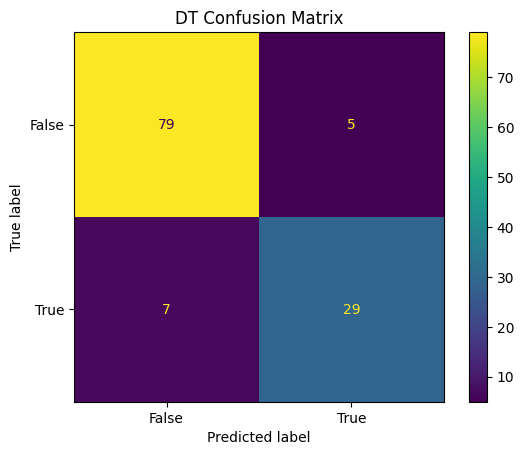

In [86]:
confusion_mat=confusion_matrix(y_pred=y_pred,y_true=ytest)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title('DT Confusion Matrix')
plt.show()

In [87]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        84
           1       0.85      0.81      0.83        36

    accuracy                           0.90       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.90      0.90      0.90       120



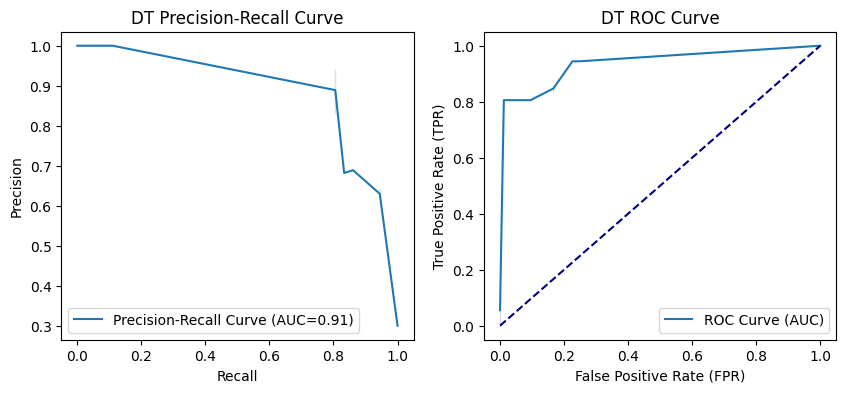

In [88]:

yscore = rfe_dt.predict_proba(Xtest)[:,1]
plt.figure(figsize=(10,4))
precision, recall, thresholds = precision_recall_curve(ytest, yscore)
auc_score = auc(recall,precision)
plt.subplot(1,2,1)
sns.lineplot(x=recall, y=precision, label=f'Precision-Recall Curve (AUC={auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('DT Precision-Recall Curve')
fpr, tpr, thresholds = roc_curve(ytest, yscore)
plt.subplot(1,2,2)
sns.lineplot(x=fpr, y=tpr, label='ROC Curve (AUC)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('DT ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

## Model: XGBoost


__Initial Model__

In [89]:
xgb_model = XGBClassifier()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)
xgb_model.fit(X_train,y_train)
y_pred= xgb_model.predict(X_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)*100:.4f}%')

Accuracy:89.5833%


In [91]:
y_pred = xgb_model.predict(Xtest)
print(f'Unseen Data Accuracy:{accuracy_score(ytest,y_pred)*100:.4f}%')
print(f'Unseen Data Recall:{recall_score(ytest,y_pred)*100:.4f}%')

Unseen Data Accuracy:92.5000%
Unseen Data Recall:88.8889%


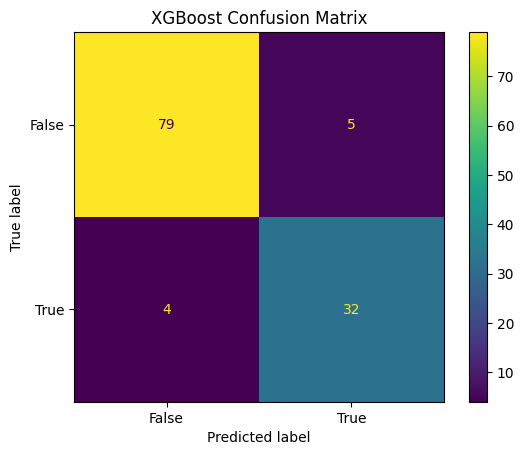

In [92]:

confusion_mat = confusion_matrix(ytest,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()

In [93]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        84
           1       0.86      0.89      0.88        36

    accuracy                           0.93       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.93      0.93      0.93       120



Hyperparameter tuning using _GridSearchCV_ (estimated run-time: 1 hour)

In [94]:
param_dist = {
    'learning_rate': [0.001,0.01],
    'n_estimators': [10, 100, 1000],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda':[1,10,100],
    'reg_alpha':[0.01,0.05]
}

Hyperparameter tuning using _GridSearchCV_ (estimated run-time: 15-20 mins)

In [95]:
grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_dist,scoring="accuracy",cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.3], 'learning_rate': [0.001, 0.01],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [10, 100, 1000],
                         'reg_alpha': [0.01, 0.05],
                         'reg_lambda': [1, 10, 100]},
             scoring='accuracy')

In [96]:
best_params = grid_search.best_params_
learning_rate = best_params['learning_rate']
n_estimators = best_params['n_estimators']
min_child_weight = best_params['min_child_weight']
gamma = best_params['gamma']
reg_lambda = best_params['reg_lambda']
reg_alpha = best_params['reg_alpha']

In [97]:
best_xgb=XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators,min_child_weight=min_child_weight,max_depth=max_depth,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda)
rfe_xgb = RFECV(best_xgb,min_features_to_select=20,cv=kf,step=1)

In [98]:
scores=[]
precision = []
recall = []
for train_index, test_index in kf.split(X_resampled,y_resampled):
  X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
  y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
  rfe_xgb.fit(X_train, y_train)
  y_pred = rfe_xgb.predict(X_test)
  score = accuracy_score(y_test,y_pred)
  rec = recall_score(y_test,y_pred)
  prec = precision_score(y_test,y_pred)
  scores.append(score)
  recall.append(rec)
  precision.append(prec)
  print(f'Fold Score: {score}')

Fold Score: 0.95
Fold Score: 0.9
Fold Score: 0.8
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.8947368421052632
Fold Score: 0.8421052631578947
Fold Score: 0.8947368421052632
Fold Score: 0.9473684210526315
Fold Score: 1.0
Fold Score: 1.0
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.9473684210526315
Fold Score: 0.7894736842105263
Fold Score: 0.9473684210526315


In [99]:
average_score = sum(scores) / len(scores)
average_precision = sum(precision)/len(precision)
average_recall = sum(recall)/len(recall)
Accuracy['XGBoost'] = average_score
All_prec['XGBoost'] = average_precision
All_rec['XGBoost'] = average_recall
print(f'Average Cross-Validation Score: {average_score*100:.4f}')
print(f'Average Precision score: {average_precision*100:.4f}')
print(f'Average Recall score: {average_recall*100:.4f}')

Average Cross-Validation Score: 94.1789
Average Precision score: 93.8496
Average Recall score: 94.6838


In [100]:
y_pred = rfe_xgb.predict([[45,90,1,0,1,1,0,0,0,230,57,0,140,6,20,3700,0,0,0,1,0,0,0]])
print(y_pred)

[1]


Testing optimized model on unseen data

In [101]:
y_pred = rfe_xgb.predict(Xtest)
test_accuracy['XGBoost'] = accuracy_score(ytest,y_pred)
test_recall['XGBoost'] = recall_score(ytest,y_pred)
test_precision['XGBoost'] = precision_score(ytest,y_pred)

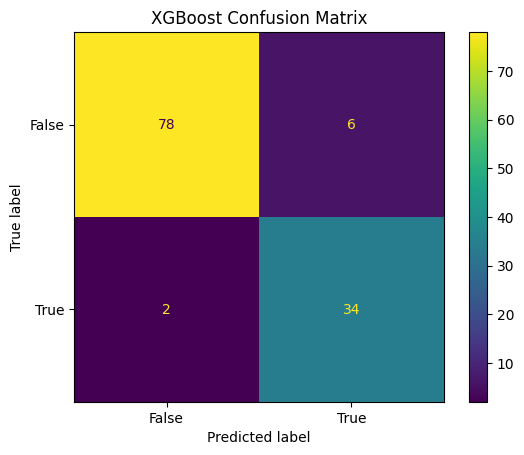

In [102]:
confusion_mat=confusion_matrix(y_pred=y_pred,y_true=ytest)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = ['False', 'True'])
cm_display.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

In [103]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        84
           1       0.85      0.94      0.89        36

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.94      0.93      0.93       120



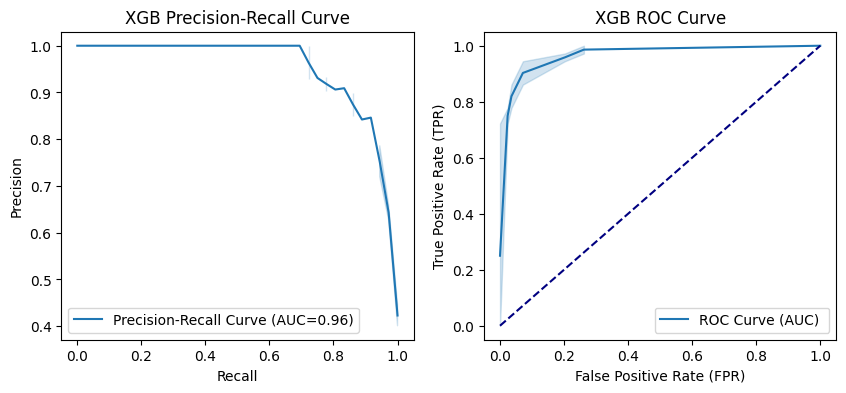

In [104]:
yscore = rfe_xgb.predict_proba(Xtest)[:,1]
plt.figure(figsize=(10,4))
precision, recall, thresholds = precision_recall_curve(ytest, yscore)
auc_score = auc(recall, precision)
plt.subplot(1,2,1)
sns.lineplot(x=recall, y=precision, label=f'Precision-Recall Curve (AUC={auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGB Precision-Recall Curve')
fpr, tpr, thresholds = roc_curve(ytest, yscore)
plt.subplot(1,2,2)
sns.lineplot(x=fpr, y=tpr, label='ROC Curve (AUC) ')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('XGB ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

<hr>

## Saving the Model

An appropriate model for Early prediction of Chronic Kidney Disease must have a **_high recall score_** i.e. the model is correctly diagnosing a person for CKD when they truly have CKD.<br>
Although precision is not relatively crucial in comparison to recall, a **_reasonable precision_** score i.e. the number of cases which the model correctly predicted a person had CKD out of all the predicted CKD diagnosis. <br>
The final factor to consider will be the accuracy of the model on unseen the unseen test dataset.<br>
Once all the factors are considered, the model can finally be saved.

In [105]:
model_name = [key for key in Accuracy.keys()]
model_accuracy = [acc for acc in Accuracy.values()]
model_precision = [prec for prec in All_prec.values()]
model_recall = [rec for rec in All_rec.values()]
model_data = pd.DataFrame([model_accuracy,model_precision,model_recall],index=['Accuracy','Precision','Recall'],columns=model_name)
model_data

Random Forest  Linear Regression  Decision Tree   XGBoost
Accuracy        0.939579           0.929368       0.916632  0.941789
Precision       0.945841           0.919162       0.911676  0.938496
Recall          0.935202           0.946172       0.917553  0.946838

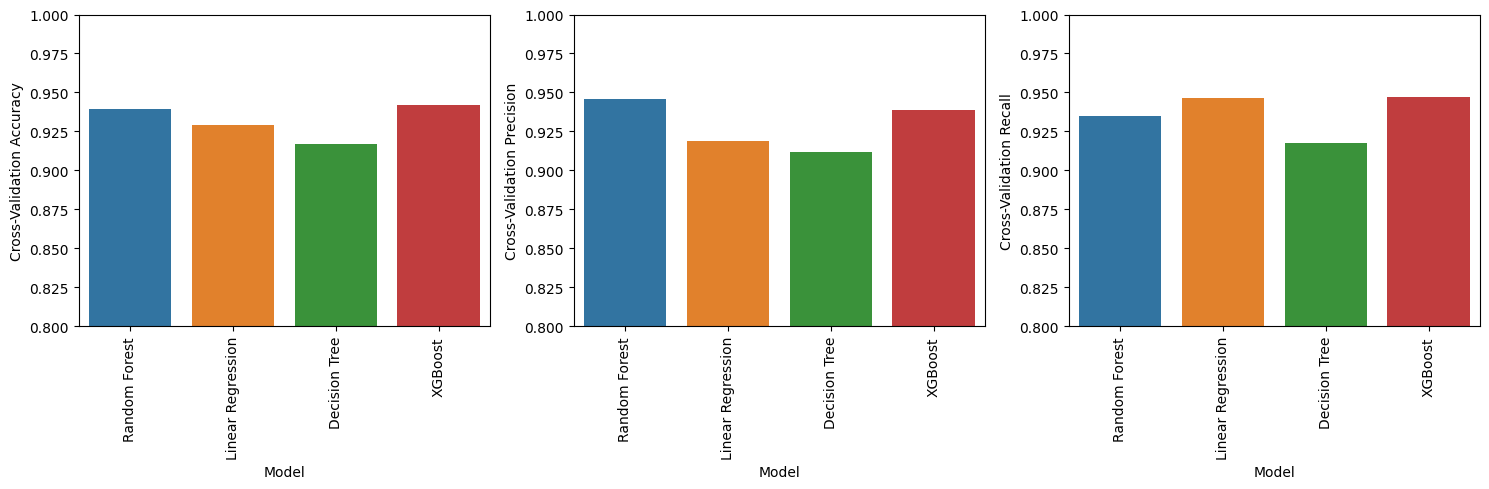

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=model_name,y=model_accuracy,hue=model_name)
plt.ylim(0.8,1)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(x=model_name,y=model_precision,hue=model_name)
plt.ylim(0.8,1)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Precision')
plt.subplot(1,3,3)
sns.barplot(x=model_name,y=model_recall,hue=model_name)
plt.ylim(0.8,1)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Recall')
plt.tight_layout()
plt.show()


From the above visualisation, `RandomForest Classifier`,`Logistic Regression`, and `XGBoost Classifier` looks promising. `DecisionTree Classifier` overall underperforms in all parameters.

In [107]:
test_name = ['Random Forest','Logistic Regression','Decision Tree','XGBoost']
test_accuracy = [acc for acc in test_accuracy.values()]
test_precision = [prec for prec in test_precision.values()]
test_recall = [rec for rec in test_recall.values()]
test_data = pd.DataFrame([test_accuracy,test_precision,test_recall],index=['Accuracy','Precision','Recall'],columns=test_name)
test_data

Random Forest  Logistic Regression  Decision Tree   XGBoost
Accuracy        0.941667             0.933333       0.900000  0.933333
Precision       0.914286             0.868421       0.852941  0.850000
Recall          0.888889             0.916667       0.805556  0.944444

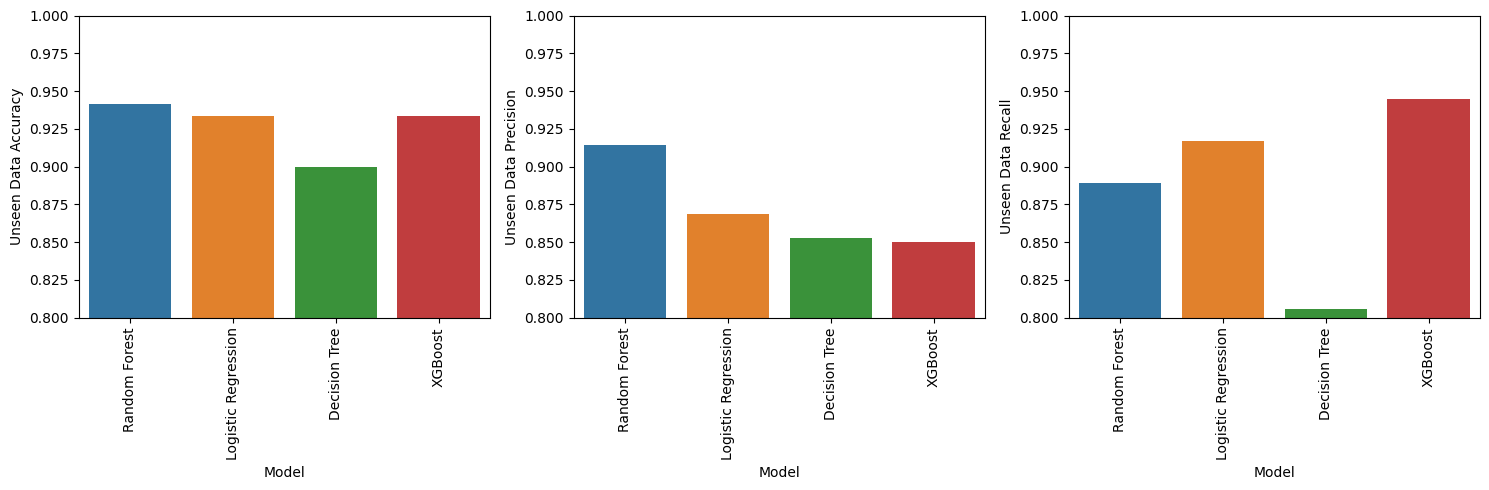

In [108]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=test_name,y=test_accuracy,hue=test_name)
plt.ylim(0.8,1)
plt.xlabel('Model')
plt.ylabel('Unseen Data Accuracy')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(x=test_name,y=test_precision,hue=test_name)
plt.ylim(0.8,1)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Unseen Data Precision')
plt.subplot(1,3,3)
sns.barplot(x=test_name,y=test_recall,hue=test_name)
plt.ylim(0.8,1)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Unseen Data Recall')
plt.tight_layout()
plt.show()

From the above visualisation, it can be observed that `XGBoost Classifier` overshadows other models in _Recall score_ while also providing decent _Precision score_ and _Accuracy_<br>
Hence, we will go forward with Random Forest Classifier and save it.

In [109]:
dump(rfe_xgb,open('CKD.pkl','wb'))
dump(label_enc,open('Label_Encoder.pkl','wb')) #dumping label encoder to use it to encode the user inserted details similar to how it was done while training

Throughout the training the model uses RFE (Recursive Feature Elimination) to eliminate features that have considerably lower contribution towards accuracy. The following columns were retained from the dataset in the final RFE model.

In [110]:
retained_features = X.columns[rfe_xgb.support_]
for i in retained_features:
    print(features[i])

Age
Blood_Pressure
Specific_gravity
Albumin
Sugar
Red_blood_cells
Pus_cell
Pus_cell_clumps
Bacteria
Blood_Glucose_Random
Blood_urea
Serum_creatinine
Sodium
Potassium
Haemoglobin
White_blood_cell_count
Red_blood_cell_count
Hypertension
Diabetes_mellitus
Coronary_artery_disease


In [111]:
dump(retained_features,open("Retained_Features.pkl","wb")) #dumping retained features to discard features that were eliminated by the RFE.

<hr>